In [1]:
# Airline Passenger Satisfaction
# code source :https://www.kaggle.com/code/haneenhossam/airlines-passenger-satisfaction-project/notebook

# data source https://www.kaggle.com/code/khsamaha/airlines-customer-satisfaction-analysis-modelling/data
#import libraires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv("train.csv") #read train file
df.head(5) #tsample of train data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df2=pd.read_csv("test.csv") #read test file
df.head(5) #sampel of test data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.describe().T #statical information about train data

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [5]:
df.info() #number of nulls and data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True) #remove unnecessary train columns

In [7]:
df.head() #data after editing

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
df2.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True) #remove unnecessary test columns

In [9]:
df2.head() #data after editing

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [10]:
#detect if there any duplicated rows
duplicates = df.duplicated().sum() 
if  duplicates == 0:
    print("there is no duplicted rows in this data")
else:
    print('there are: ', str(duplicates), " duplicates")

there is no duplicted rows in this data


In [11]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [12]:
df2.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [13]:
# number of null is too low according to the whole data so we can remove it in train
df.dropna(inplace = True) 
df.isnull().sum() #check null again

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [14]:
df2.dropna(inplace = True)
df2.isnull().sum() #check null again in test

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

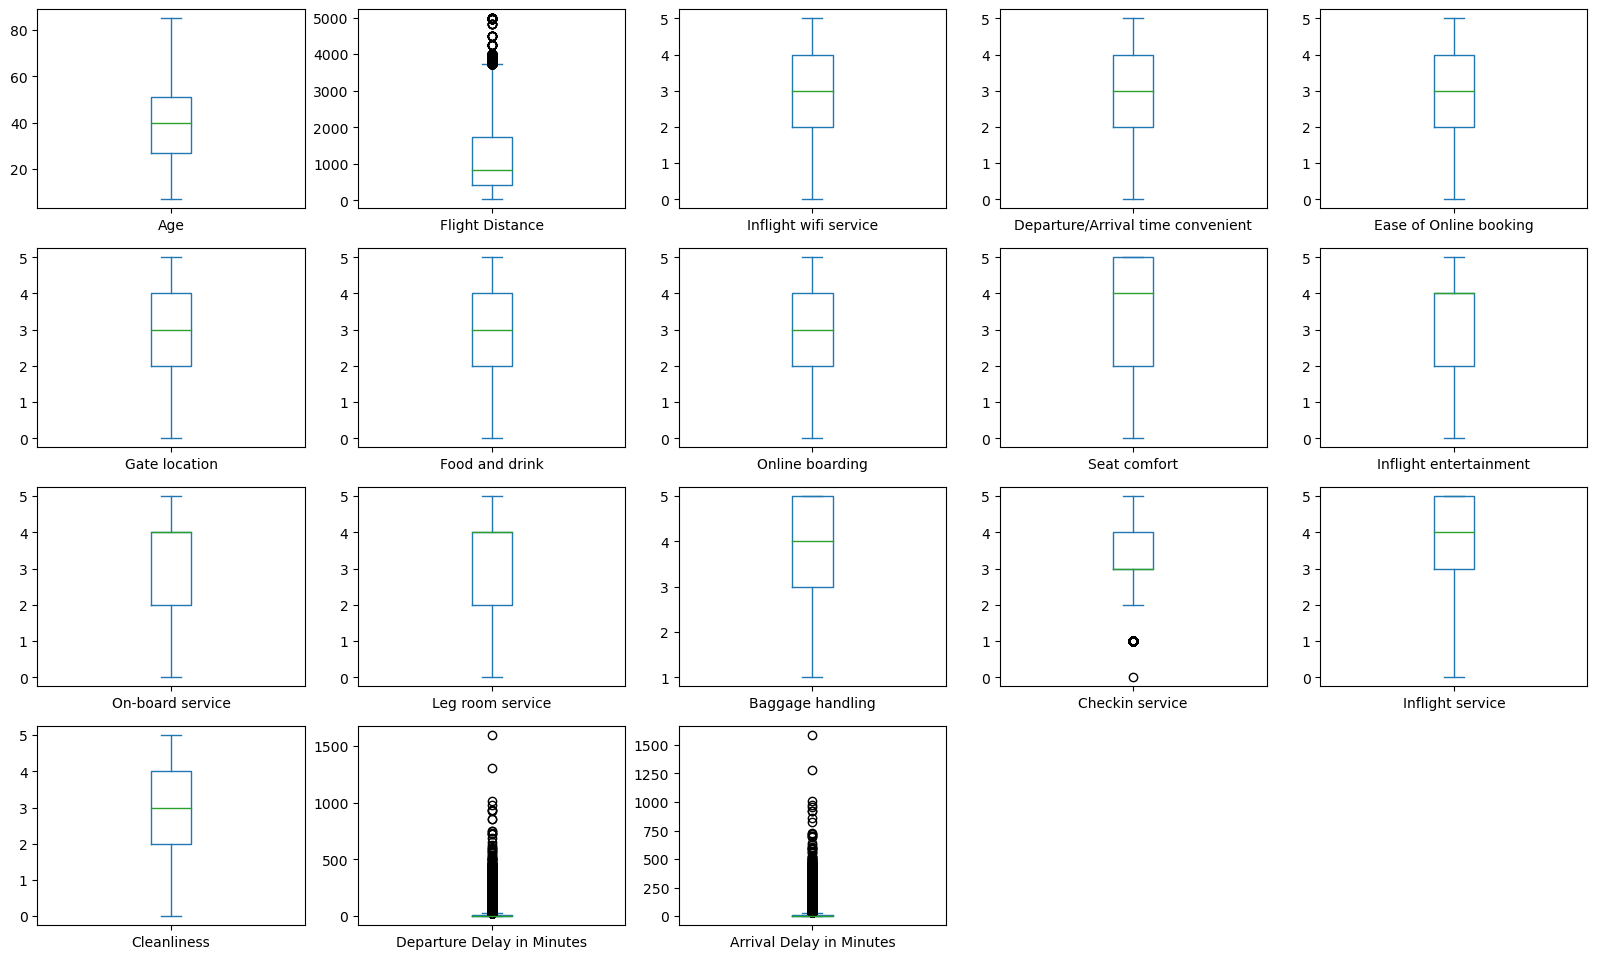

In [15]:
#check outliers
df.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (5,5))
plt.show()

In [16]:
#statical information about columns with outliers 
df[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].describe().T

,count,mean,std,min,25%,50%,75%,max
Flight Distance,103594.0,1189.325202,997.297235,31.0,414.0,842.0,1743.0,4983.0
Departure Delay in Minutes,103594.0,14.747939,38.116737,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,103594.0,15.178678,38.698682,0.0,0.0,0.0,13.0,1584.0


<AxesSubplot:xlabel='Flight Distance'>

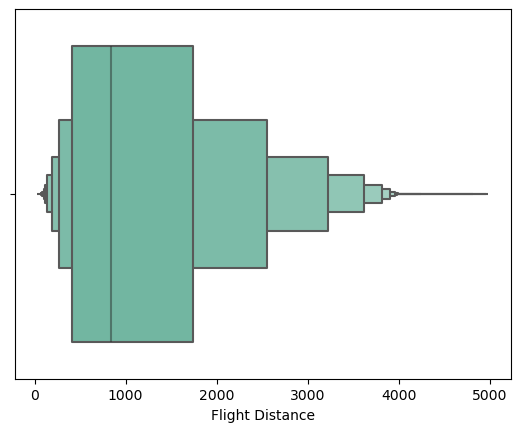

In [17]:
#removing outliers from the columns
sns.boxenplot(x =df['Flight Distance'], palette = 'Set2')

In [18]:
df.loc[df['Flight Distance'] > 3736.5].shape #get number of rows with outliers (Q3 + 1.5(Q3 - Q1))

(2287, 23)

In [19]:
outliers_distance = df[df['Flight Distance'] > 3736.5]
df.drop(outliers_distance.index, inplace = True)

<AxesSubplot:xlabel='Departure Delay in Minutes'>

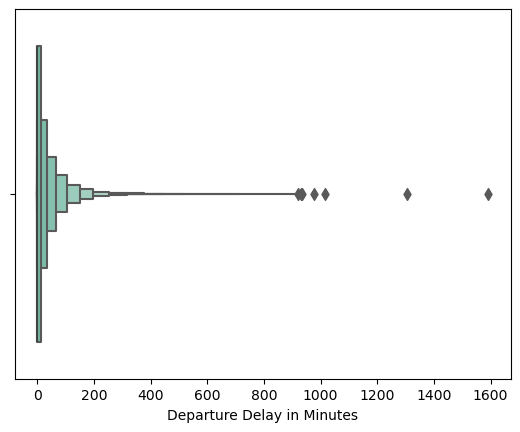

In [20]:
#removing outliers from the columns
sns.boxenplot(x =df['Departure Delay in Minutes'], palette = 'Set2')

In [21]:
df.loc[df['Departure Delay in Minutes'] > 800].shape

(8, 23)

In [22]:
outliers_departure = df[df['Departure Delay in Minutes'] > 800]
df.drop(outliers_departure.index, inplace = True)

<AxesSubplot:xlabel='Departure Delay in Minutes'>

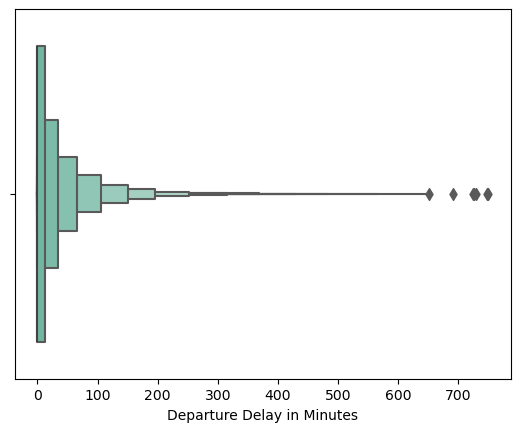

In [23]:
sns.boxenplot(x =df['Departure Delay in Minutes'], palette = 'Set2')

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

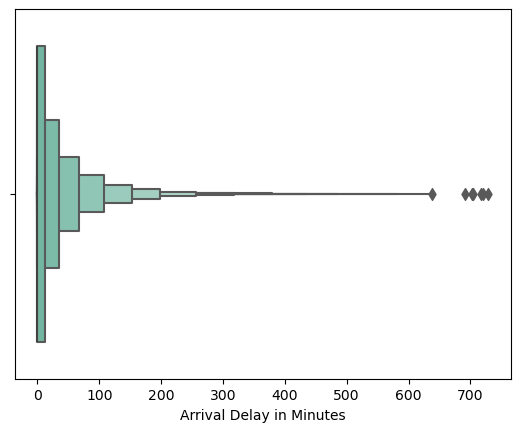

In [24]:
sns.boxenplot(x =df['Arrival Delay in Minutes'], palette = 'Set2')

In [25]:
df.loc[df['Arrival Delay in Minutes'] > 650].shape

(6, 23)

In [26]:
outlier_arrival = df[df['Arrival Delay in Minutes'] > 650]
df.drop(outlier_arrival.index, inplace = True)

In [27]:
df.rename(columns = lambda x:x.strip().lower().replace(" ", "_"), inplace = True)
df2.rename(columns = lambda x:x.strip().lower().replace(" ", "_"), inplace = True)#rename the columns

In [28]:
df.columns #check columns after renaming

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

<AxesSubplot:>

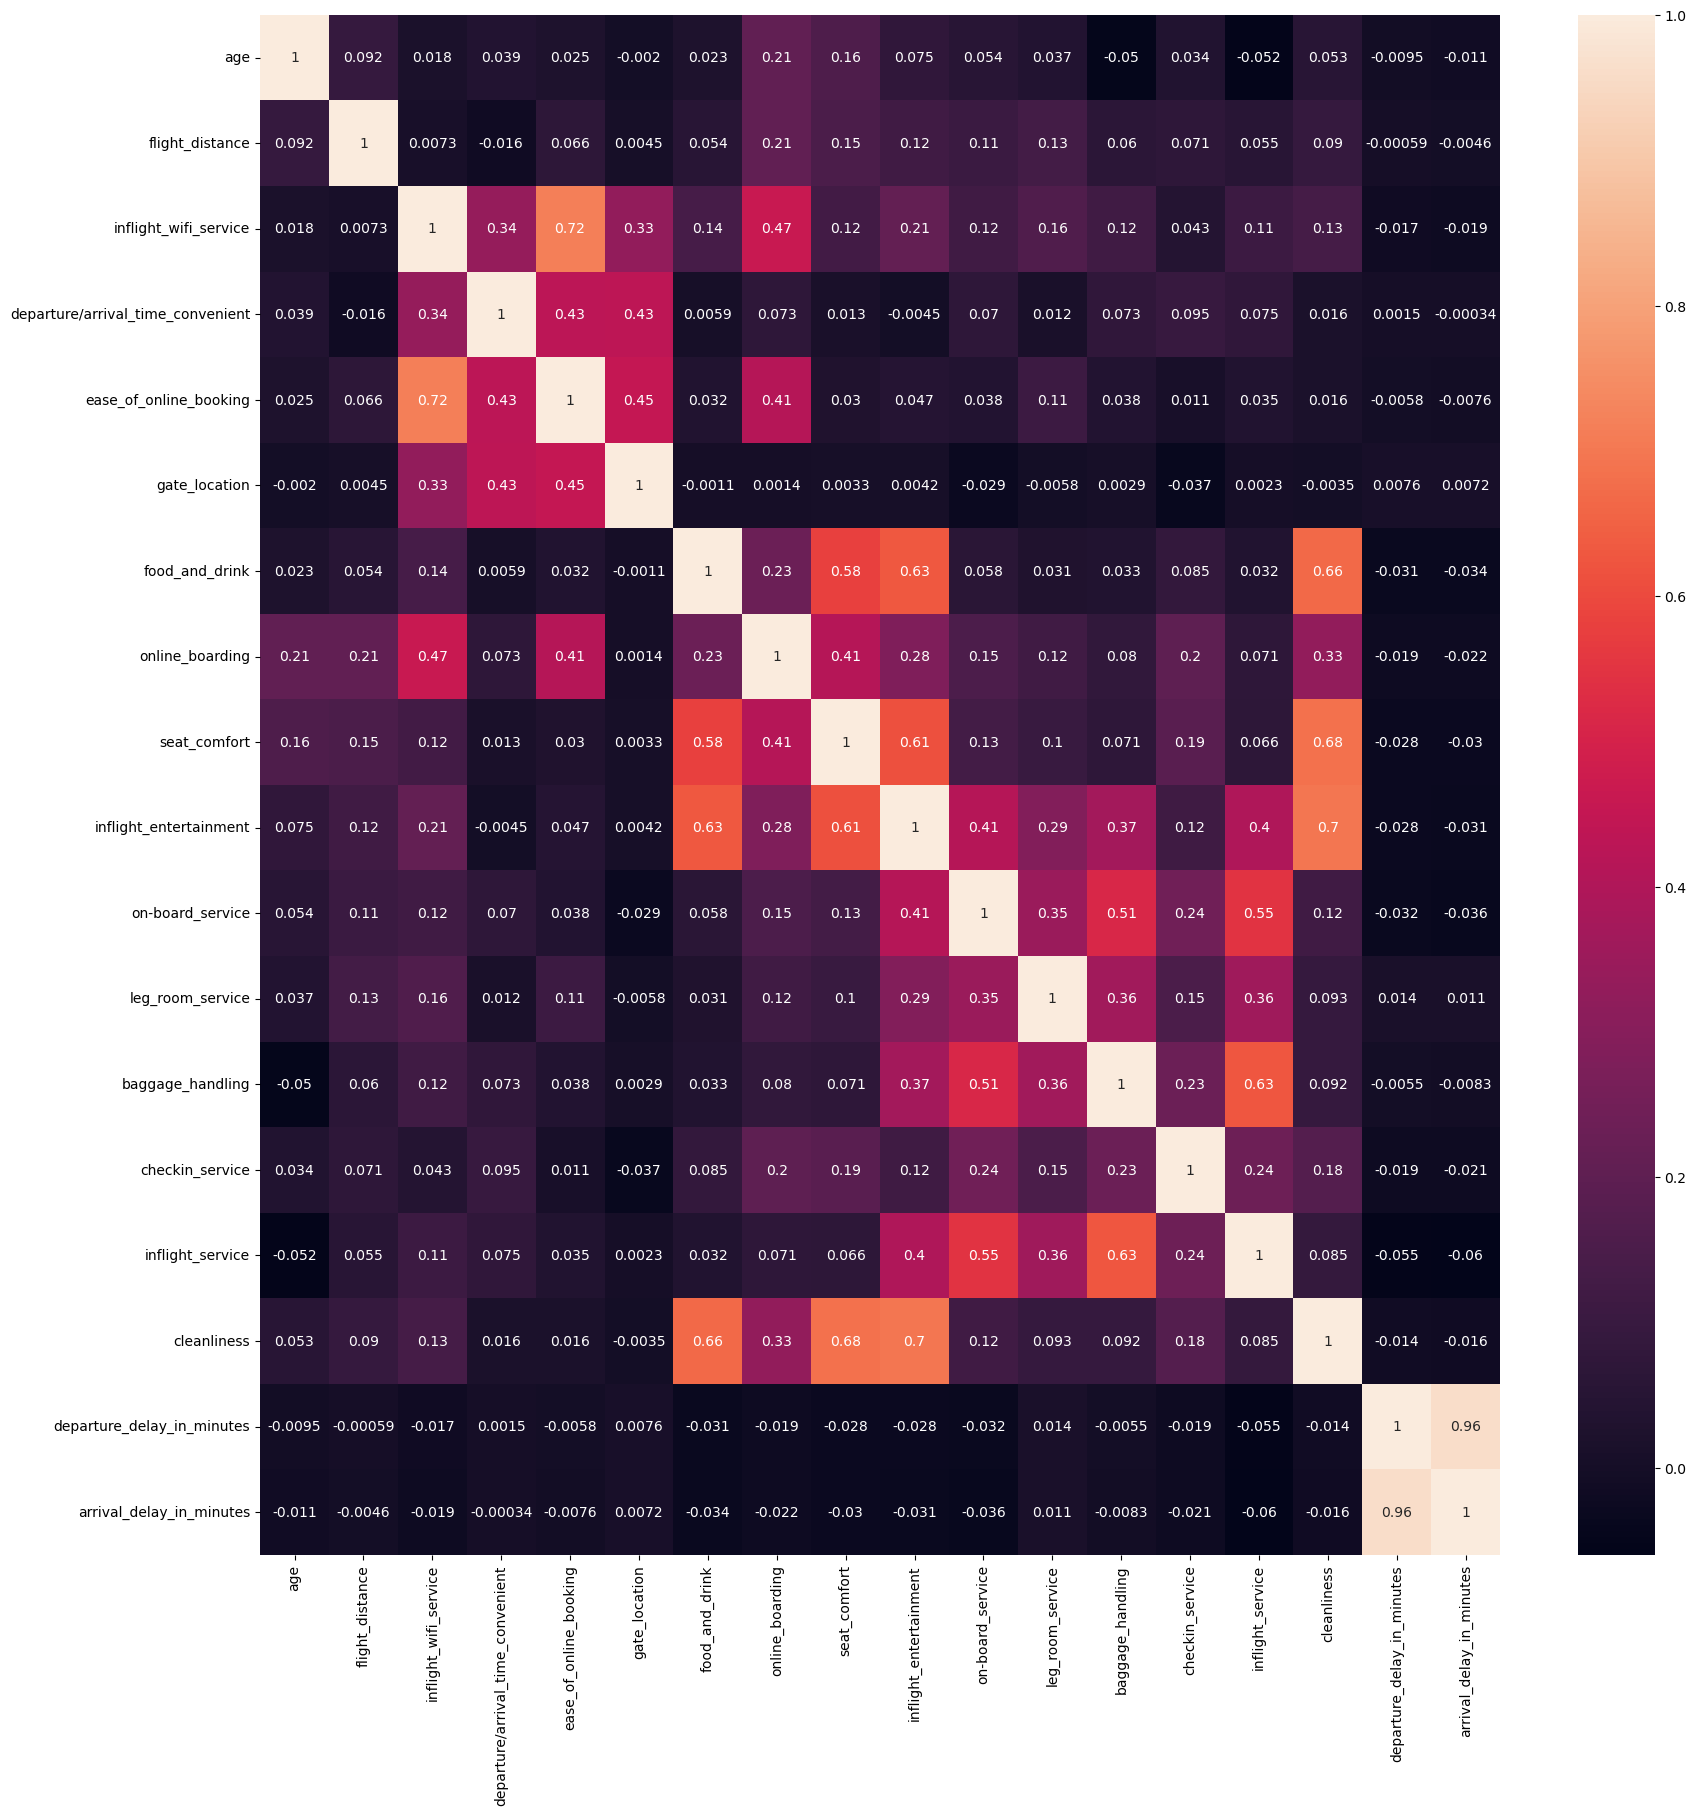

In [29]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

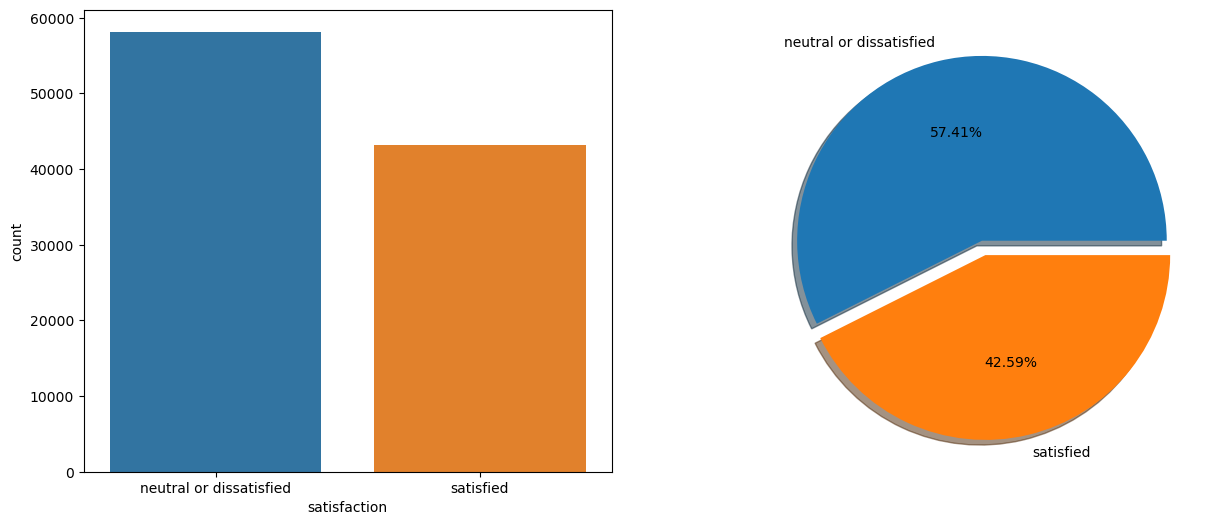

In [30]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['satisfaction'], data = df)

plt.subplot(1, 2, 2)
label = [df.satisfaction.unique()[0], df.satisfaction.unique()[1]]
plt.pie(x= df['satisfaction'].value_counts(), labels = label, explode = (0, 0.08), shadow = True, autopct = '%1.2f%%')

plt.show()

In [31]:
def plot_data(column):
    plt.figure(figsize = (10, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x = df[column], data = df)

    plt.subplot(1, 2, 2)
    label = [df.satisfaction.unique()[0], df.satisfaction.unique()[1]]
    sns.countplot(x = df[column], hue = 'satisfaction', data = df, )

    plt.show()

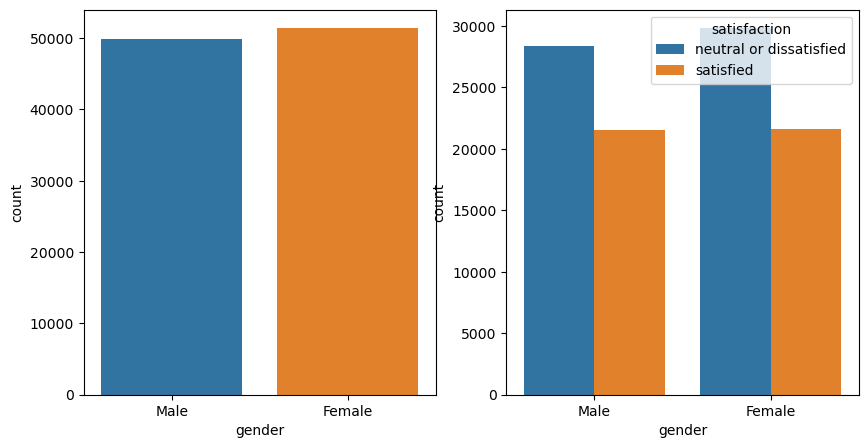

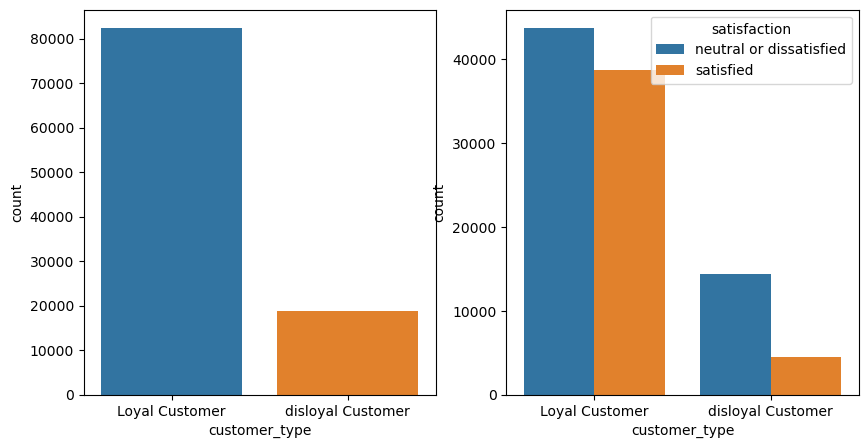

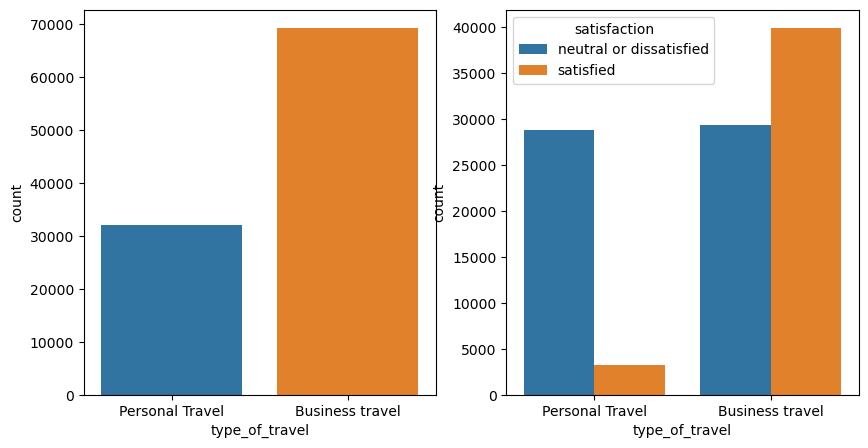

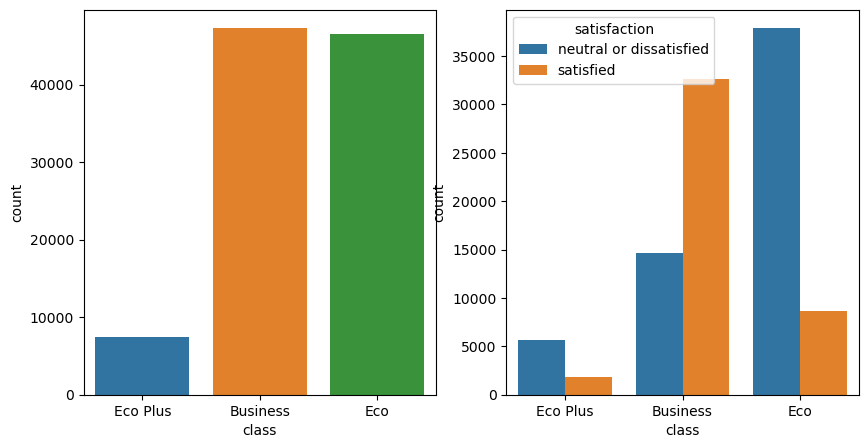

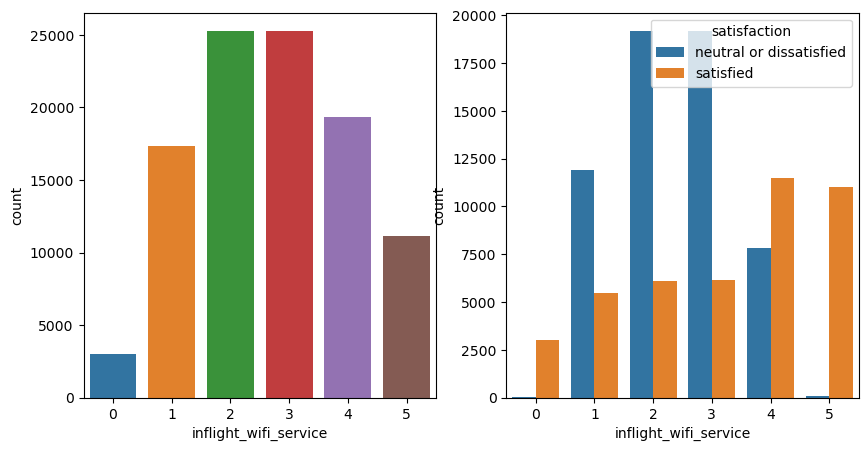

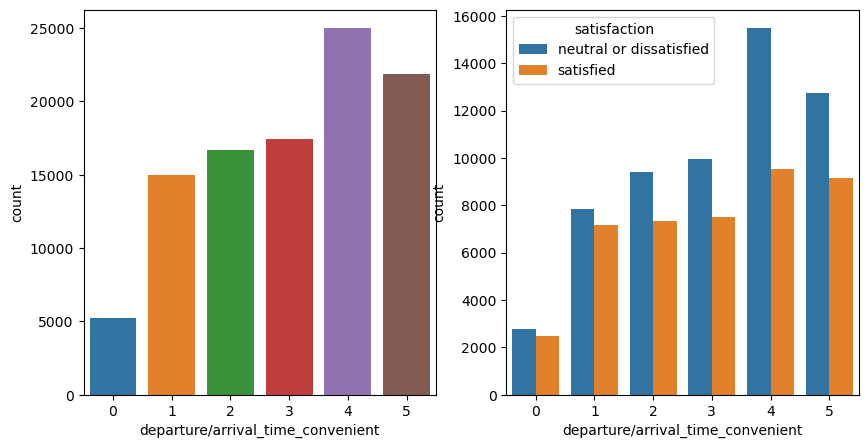

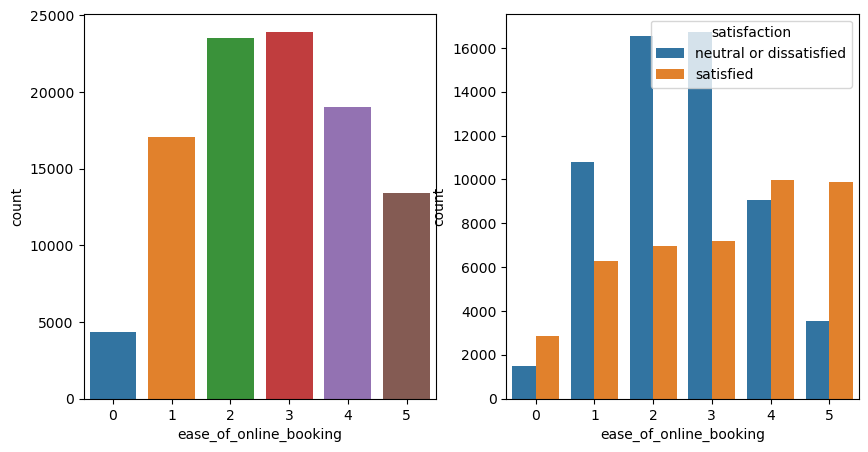

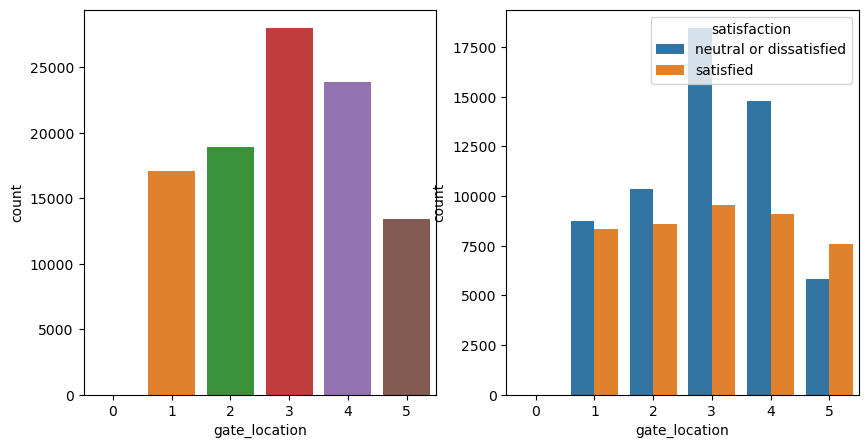

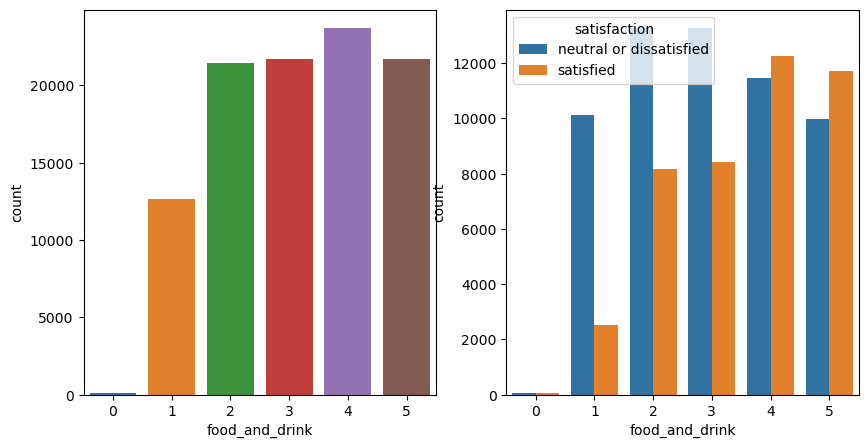

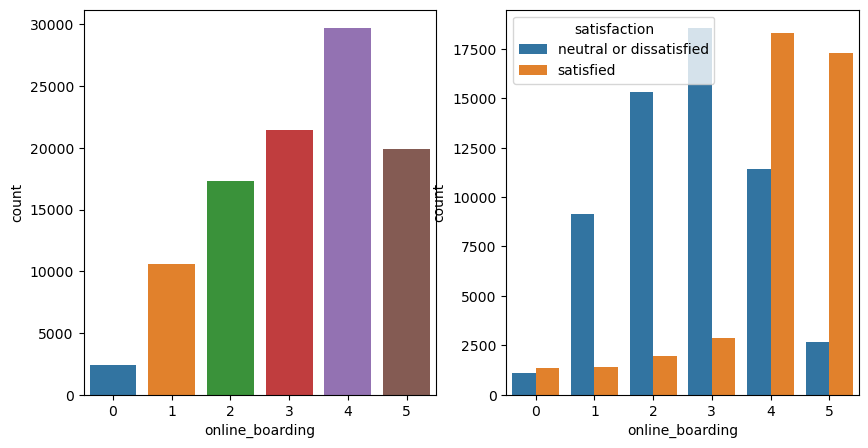

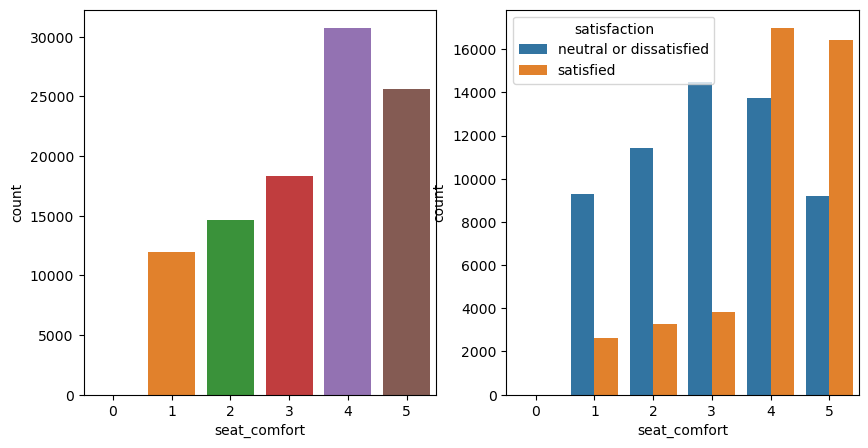

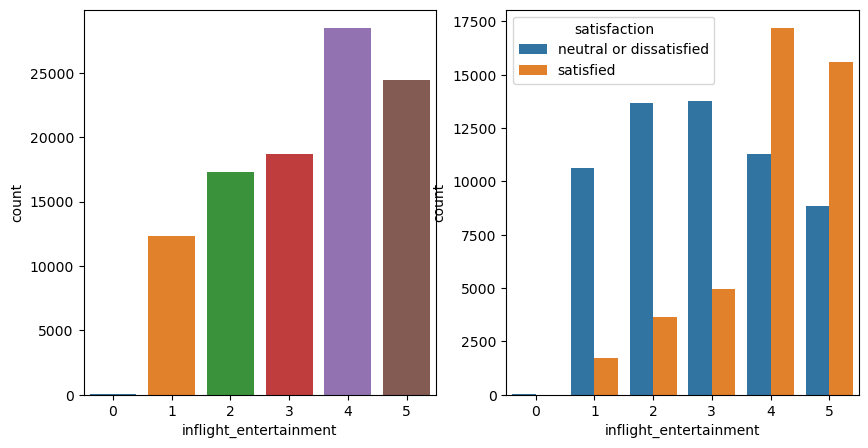

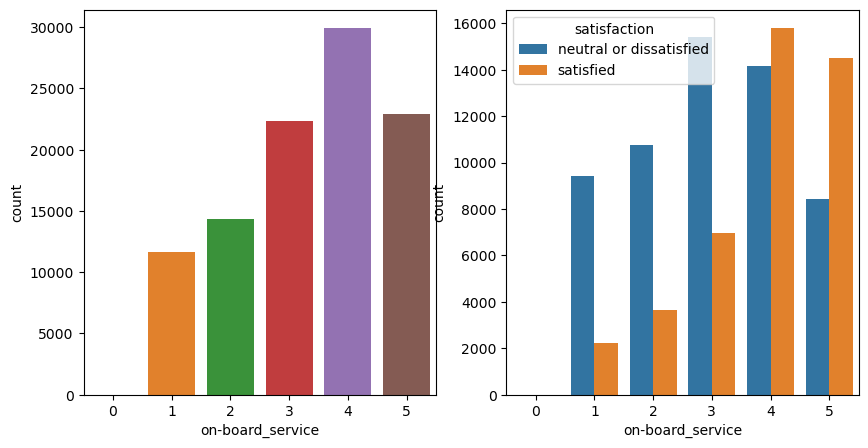

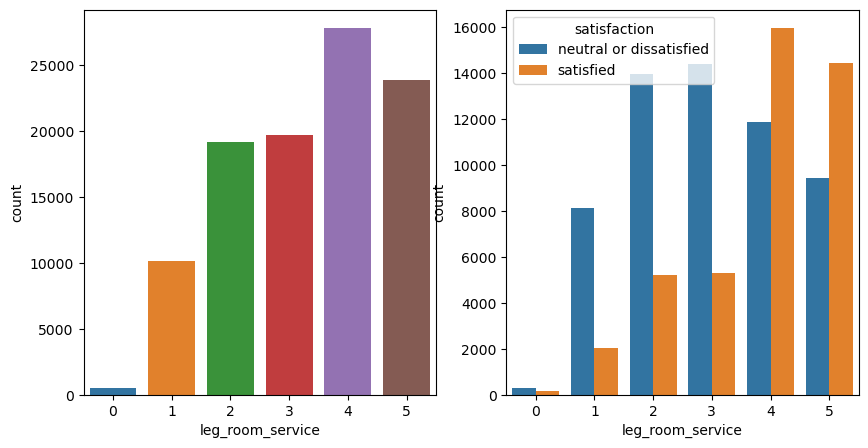

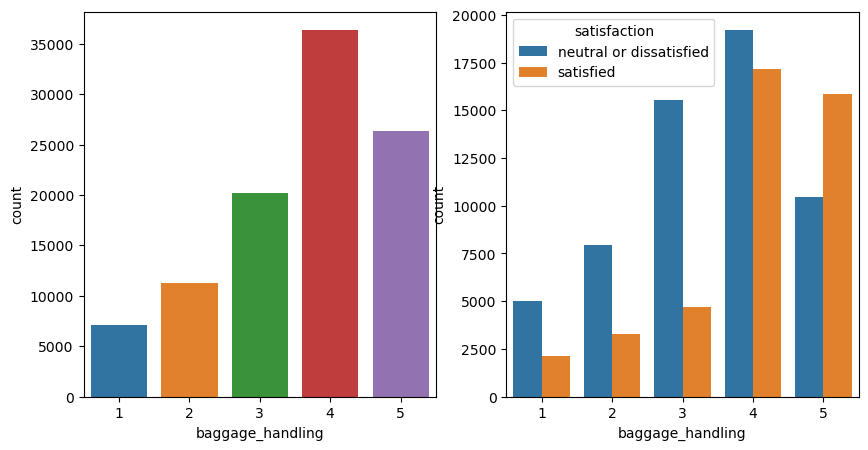

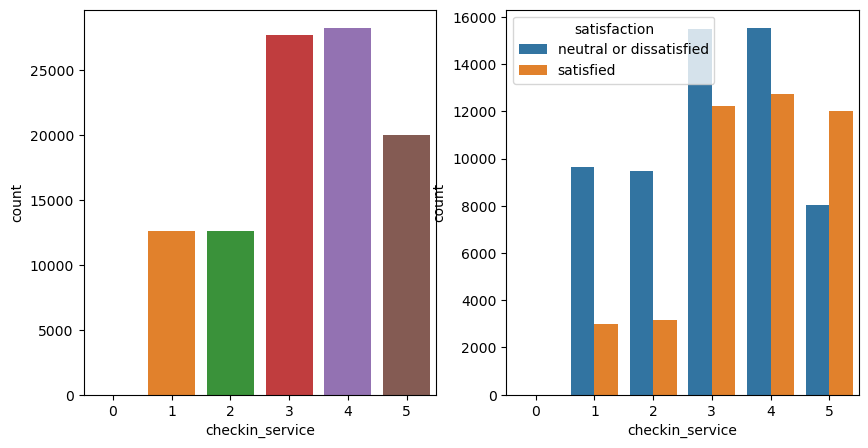

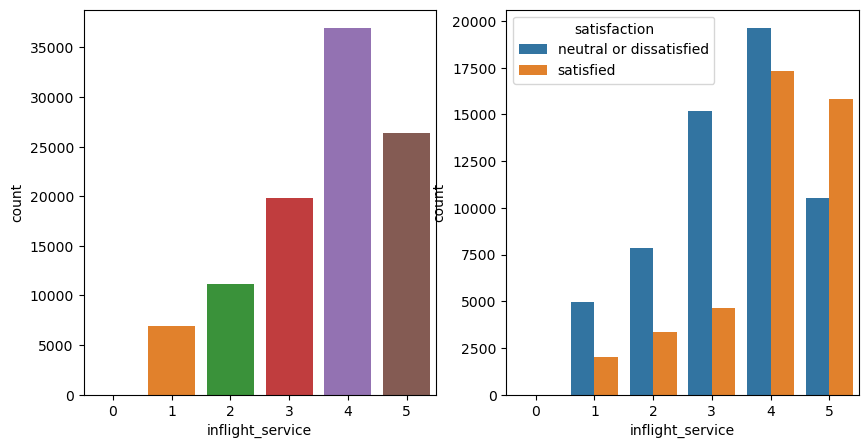

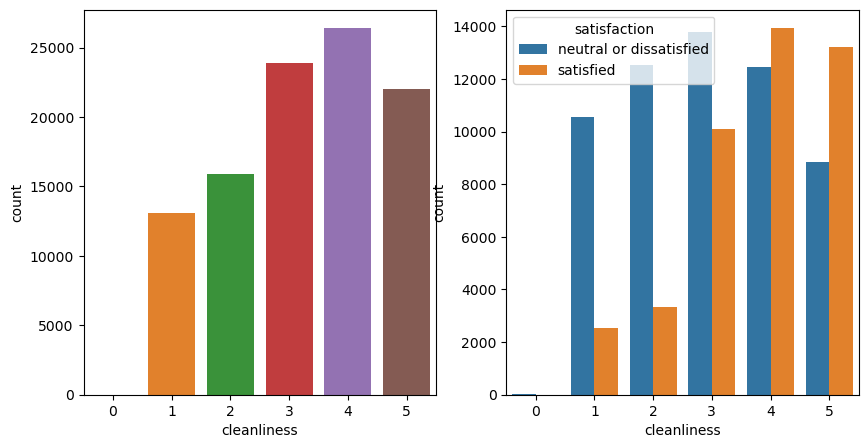

In [32]:
for i in df.columns:
    if len(df[i].unique())<= 6 and i != 'satisfaction':
        plot_data(i)

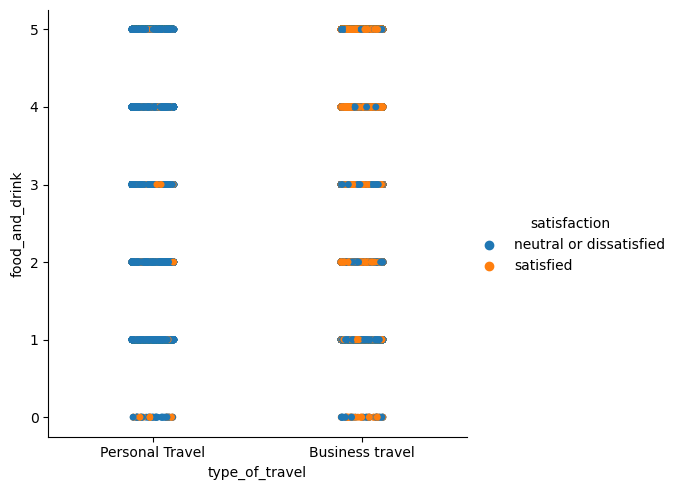

In [33]:
sns.catplot(x="type_of_travel", y="food_and_drink", hue="satisfaction",data= df)
plt.title = ("Effect of Food and drink on satisfaction in different types of travel")

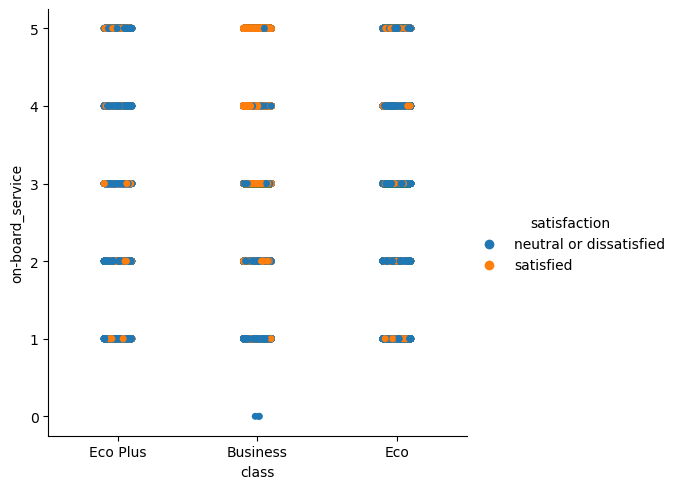

In [34]:
sns.catplot(x="class", y="on-board_service", hue="satisfaction",data= df)
plt.title = ('Effect of on-board service on satisfaction in different classes')

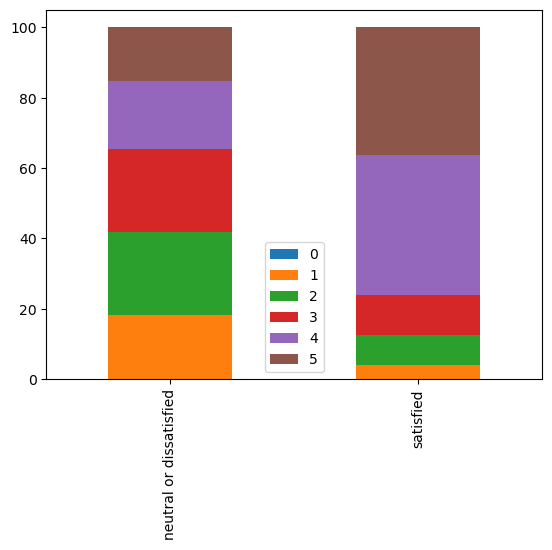

In [35]:
satis=df["satisfaction"]
num0=satis[df["inflight_entertainment"]==0].value_counts()
num1=satis[df["inflight_entertainment"]==1].value_counts()
num2=satis[df["inflight_entertainment"]==2].value_counts()
num3=satis[df["inflight_entertainment"]==3].value_counts()
num4=satis[df["inflight_entertainment"]==4].value_counts()
num5=satis[df["inflight_entertainment"]==5].value_counts()
plotdata=pd.DataFrame({"0":num0, "1":num1, "2":num2,"3":num3,"4":num4,"5":num5})
plotdata2=plotdata.div(plotdata.sum(axis=1),axis=0)*100
plotdata2.plot(kind='bar',stacked = True)
plt.title =('Effect of Inflight entertainment on satisfaction')

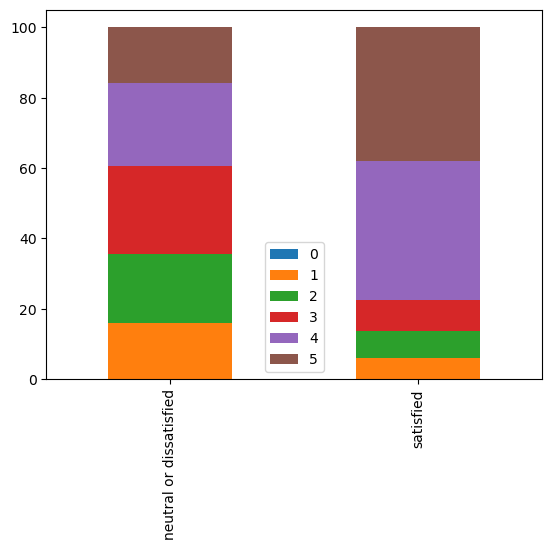

In [36]:
satis=df["satisfaction"]
num0=satis[df["seat_comfort"]==0].value_counts()
num1=satis[df["seat_comfort"]==1].value_counts()
num2=satis[df["seat_comfort"]==2].value_counts()
num3=satis[df["seat_comfort"]==3].value_counts()
num4=satis[df["seat_comfort"]==4].value_counts()
num5=satis[df["seat_comfort"]==5].value_counts()
plotdata=pd.DataFrame({"0":num0, "1":num1, "2":num2,"3":num3,"4":num4,"5":num5})
plotdata2=plotdata.div(plotdata.sum(axis=1),axis=0)*100
plotdata2.plot(kind='bar',stacked = True, style="Classic")
plt.title ="Effect of Seat comfort on satisfaction"

In [37]:
group_data = df.groupby(['class']).mean().T[2:16]
group_data

class,Business,Eco,Eco Plus
inflight_wifi_service,2.776821,2.675525,2.767529
departure/arrival_time_convenient,2.904811,3.198995,3.216517
ease_of_online_booking,2.914328,2.605491,2.661751
gate_location,2.982785,2.972438,2.966618
food_and_drink,3.319679,3.087113,3.123207
online_boarding,3.707751,2.812735,2.890468
seat_comfort,3.753727,3.139337,3.184609
inflight_entertainment,3.627683,3.098412,3.142915
on-board_service,3.678439,3.120840,3.045717
leg_room_service,3.640541,3.085480,3.061402


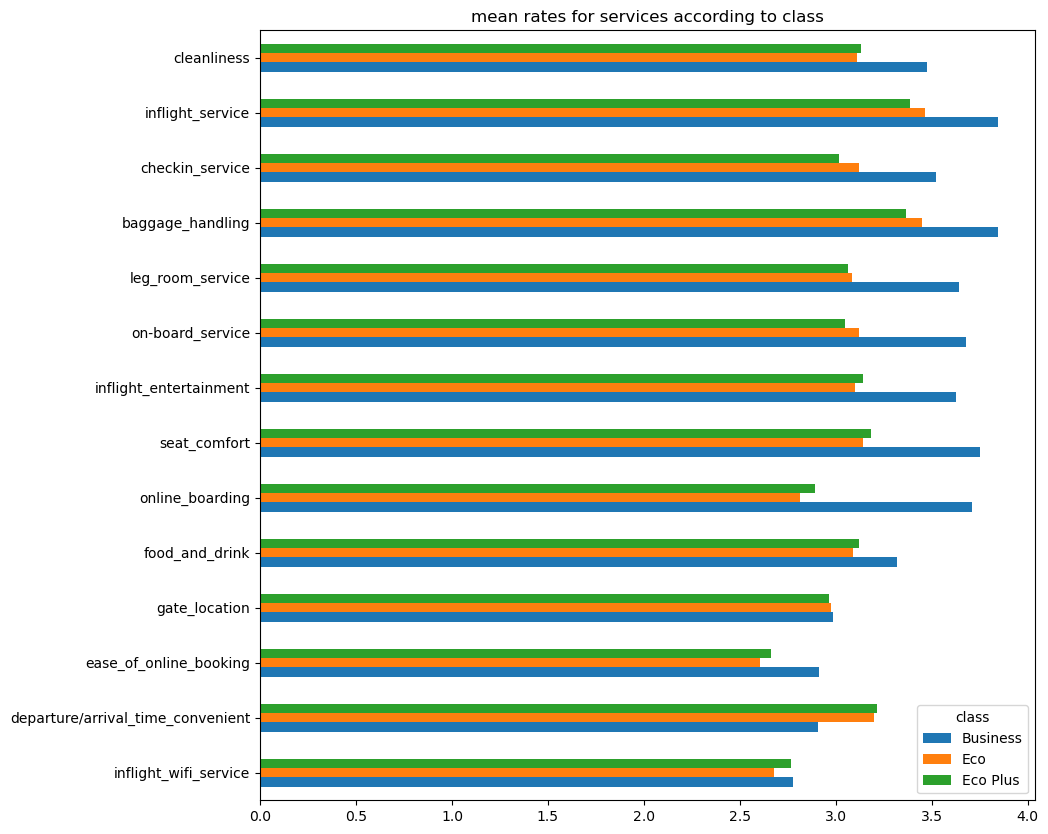

In [38]:
group_data.plot.barh(figsize = (10, 10), stacked = False, title = 'mean rates for services according to class')
plt.show()

In [39]:
data = df.groupby(['type_of_travel']).mean().T[2:16]
group_data

class,Business,Eco,Eco Plus
inflight_wifi_service,2.776821,2.675525,2.767529
departure/arrival_time_convenient,2.904811,3.198995,3.216517
ease_of_online_booking,2.914328,2.605491,2.661751
gate_location,2.982785,2.972438,2.966618
food_and_drink,3.319679,3.087113,3.123207
online_boarding,3.707751,2.812735,2.890468
seat_comfort,3.753727,3.139337,3.184609
inflight_entertainment,3.627683,3.098412,3.142915
on-board_service,3.678439,3.120840,3.045717
leg_room_service,3.640541,3.085480,3.061402


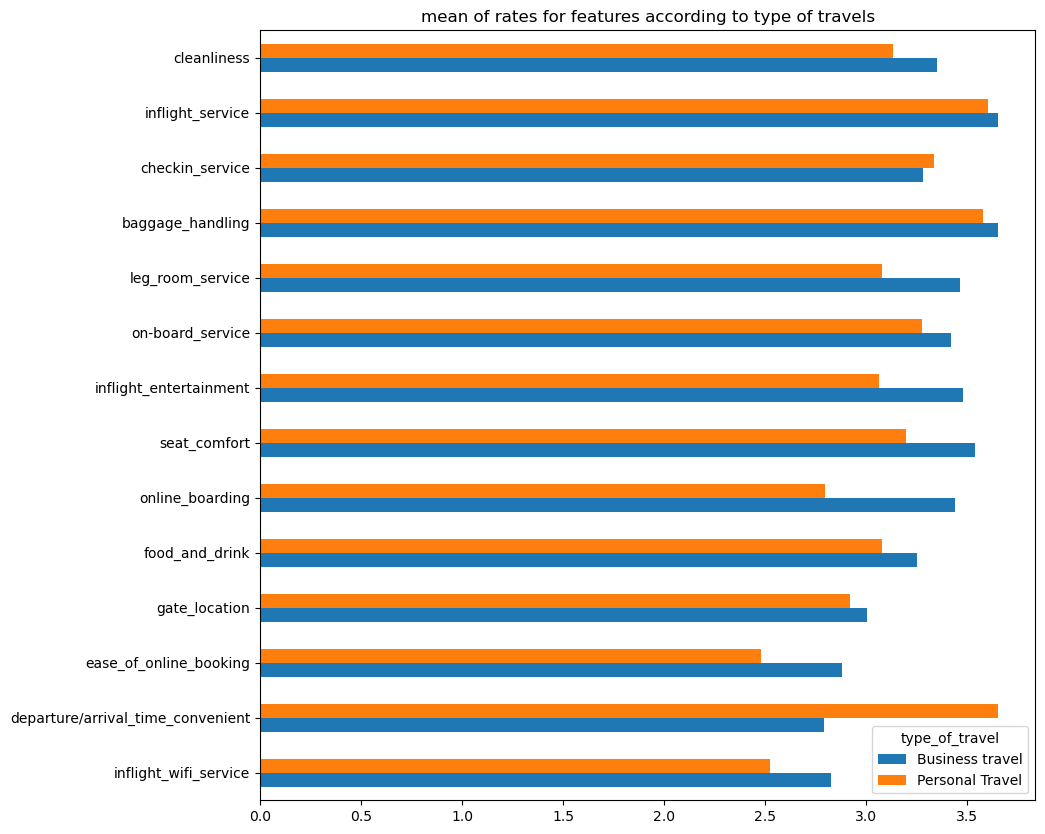

In [40]:
data.plot.barh(figsize = (10, 10), title = 'mean of rates for features according to type of travels')
plt.show()

In [41]:
grouped = df.groupby(['customer_type', 'type_of_travel', 'satisfaction'])['age'].count()[:6]
grouped

customer_type      type_of_travel   satisfaction           
Loyal Customer     Business travel  neutral or dissatisfied    15025
                                    satisfied                  35426
                   Personal Travel  neutral or dissatisfied    28693
                                    satisfied                   3232
disloyal Customer  Business travel  neutral or dissatisfied    14299
                                    satisfied                   4455
Name: age, dtype: int64

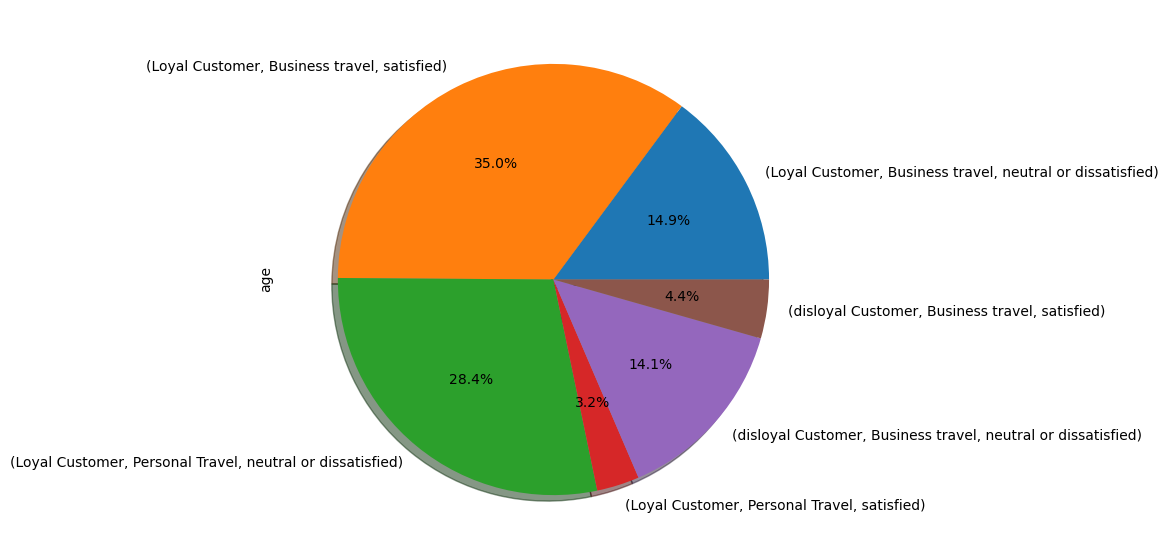

In [42]:
grouped.plot.pie(shadow = True , autopct = '%1.1f%%', subplots = True, figsize = (7, 7))
plt.show()

In [43]:
grouped = df.groupby(['customer_type', 'type_of_travel']).mean().T[2:16]
grouped

customer_type                      Loyal Customer                  \
type_of_travel                    Business travel Personal Travel   
inflight_wifi_service                    2.869140        2.521723   
departure/arrival_time_convenient        2.942003        3.651182   
ease_of_online_booking                   2.948306        2.478872   
gate_location                            3.007572        2.918121   
food_and_drink                           3.335791        3.077901   
online_boarding                          3.710154        2.799749   
seat_comfort                             3.740005        3.196868   
inflight_entertainment                   3.642049        3.063774   
on-board_service                         3.494856        3.274268   
leg_room_service                         3.557531        3.077463   
baggage_handling                         3.636479        3.575662   
checkin_service                          3.307685        3.336977   
inflight_service                         3.637391        3.601159   
cleanliness                              3.459416        3.132247   

customer_type                     disloyal Customer                  
type_of_travel                      Business travel Personal Travel  
inflight_wifi_service                      2.709022        2.613497  
departure/arrival_time_convenient          2.381732        3.668712  
ease_of_online_booking                     2.701077        2.466258  
gate_location                              2.994401        2.944785  
food_and_drink                             3.034659        3.073620  
online_boarding                            2.711155        2.472393  
seat_comfort                               2.993975        2.981595  
inflight_entertainment                     3.047190        3.085890  
on-board_service                           3.227898        3.306748  
leg_room_service                           3.217660        3.257669  
baggage_handling                           3.693185        3.717791  
checkin_service                            3.217927        3.257669  
inflight_service                           3.697824        3.773006  
cleanliness                                3.053215        3.098160

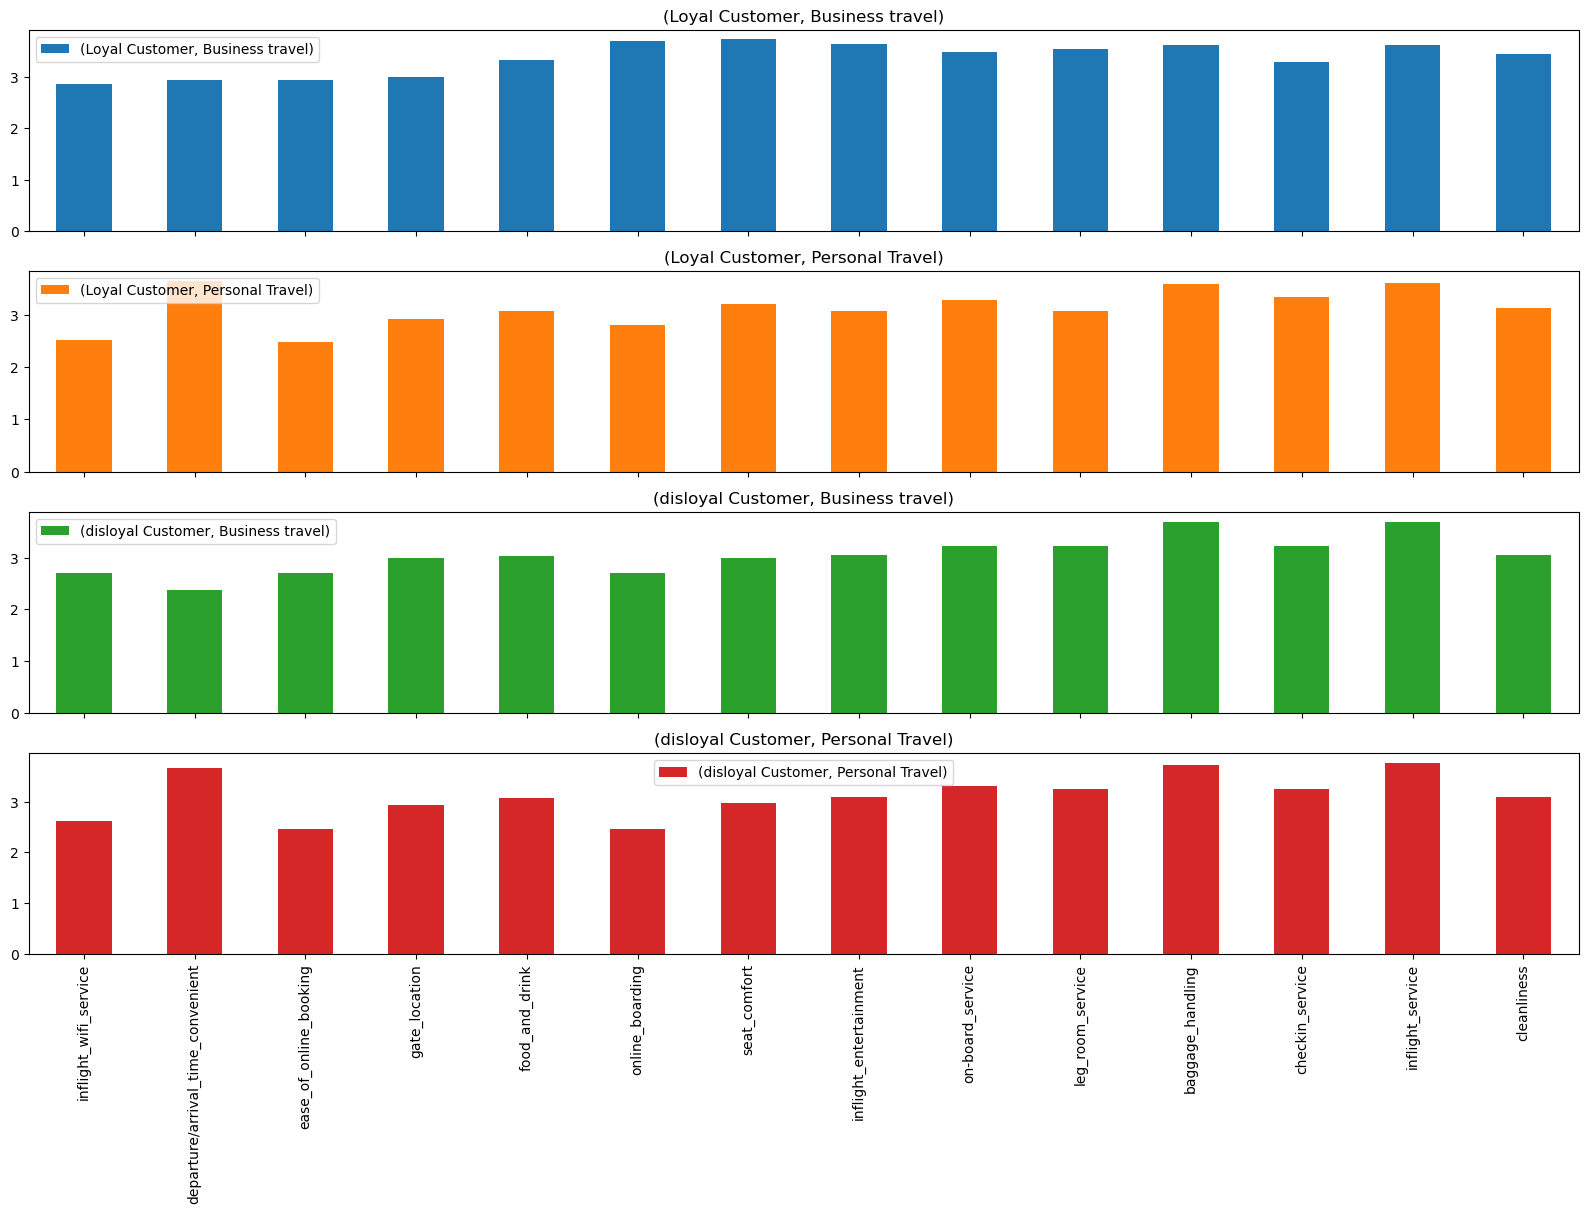

In [44]:
grouped.plot.bar(figsize = (20, 12), subplots = True)
plt.show()

In [45]:
b = buisness_travels = df[df['type_of_travel'] == 'Business travel'] #get the data of buisness travles on a separate container
buisness_travels.drop(['gender', 'departure_delay_in_minutes', 'flight_distance'], axis = 1, inplace = True) #drop unnecessary columns

/var/folders/lf/hwptlvxd6vv42x9tfj9kdx800000gn/T/ipykernel_7309/823795196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buisness_travels.drop(['gender', 'departure_delay_in_minutes', 'flight_distance'], axis = 1, inplace = True) #drop unnecessary columns


In [46]:
p = personal_travels = df[df['type_of_travel'] == 'Personal Travel']
personal_travels.drop(['gender', 'departure_delay_in_minutes', 'flight_distance'], axis = 1, inplace = True)

/var/folders/lf/hwptlvxd6vv42x9tfj9kdx800000gn/T/ipykernel_7309/1027322710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personal_travels.drop(['gender', 'departure_delay_in_minutes', 'flight_distance'], axis = 1, inplace = True)


In [47]:
buisness_travels.head(5) #sample of buisness travles

,customer_type,age,type_of_travel,class,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
1,disloyal Customer,25,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,6.0,neutral or dissatisfied
2,Loyal Customer,26,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,satisfied
3,Loyal Customer,25,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,9.0,neutral or dissatisfied
4,Loyal Customer,61,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,satisfied
7,Loyal Customer,52,Business travel,Business,4,3,4,4,5,5,5,5,5,5,5,4,5,4,0.0,satisfied


In [48]:
personal_travels.head() #sample of personal travels

,customer_type,age,type_of_travel,class,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
0,Loyal Customer,13,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,18.0,neutral or dissatisfied
5,Loyal Customer,26,Personal Travel,Eco,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0,neutral or dissatisfied
6,Loyal Customer,47,Personal Travel,Eco,2,4,2,3,2,2,2,2,3,3,4,3,5,2,23.0,neutral or dissatisfied
11,Loyal Customer,12,Personal Travel,Eco Plus,2,4,2,2,1,2,1,1,1,2,5,5,5,1,0.0,neutral or dissatisfied
13,Loyal Customer,33,Personal Travel,Eco,4,2,4,3,4,4,4,4,4,5,2,2,2,4,0.0,satisfied


/var/folders/lf/hwptlvxd6vv42x9tfj9kdx800000gn/T/ipykernel_7309/4292164081.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(buisness_travels['age']).set_title("buisness customers' age dist")
/var/folders/lf/hwptlvxd6vv42x9tfj9kdx800000gn/T/ipykernel_7309/4292164081.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

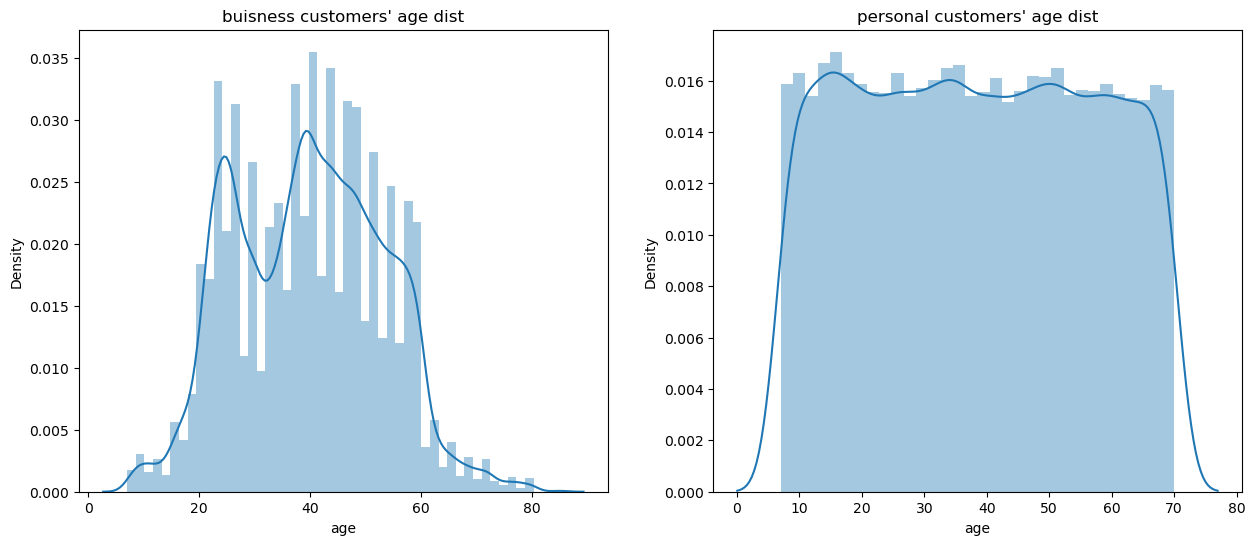

In [49]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title = ('age_distribution')
sns.distplot(buisness_travels['age']).set_title("buisness customers' age dist")

plt.subplot(1, 2, 2)
plt.title = ('age distribution in personal travels')
sns.distplot(personal_travels['age']).set_title("personal customers' age dist")

plt.show()

In [50]:
def separate_ages(age):
    if age <= 18:
        return 'underage'
    elif 18 < age <= 30:
        return 'youth'
    elif 30 < age < 60:
        return 'adult'
    else:
        return 'old'

In [51]:
buisness_travels.age = buisness_travels.age.apply(separate_ages)
personal_travels.age = personal_travels.age.apply(separate_ages)

/var/folders/lf/hwptlvxd6vv42x9tfj9kdx800000gn/T/ipykernel_7309/106141775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buisness_travels.age = buisness_travels.age.apply(separate_ages)
/var/folders/lf/hwptlvxd6vv42x9tfj9kdx800000gn/T/ipykernel_7309/106141775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personal_travels.age = personal_travels.age.apply(separate_ages)


In [52]:
print(buisness_travels.age.value_counts())
print(personal_travels.age.value_counts())

adult       44947
youth       17518
old          4102
underage     2638
Name: age, dtype: int64
adult       14550
underage     6171
youth        5963
old          5404
Name: age, dtype: int64


TypeError: countplot() got multiple values for argument 'data'

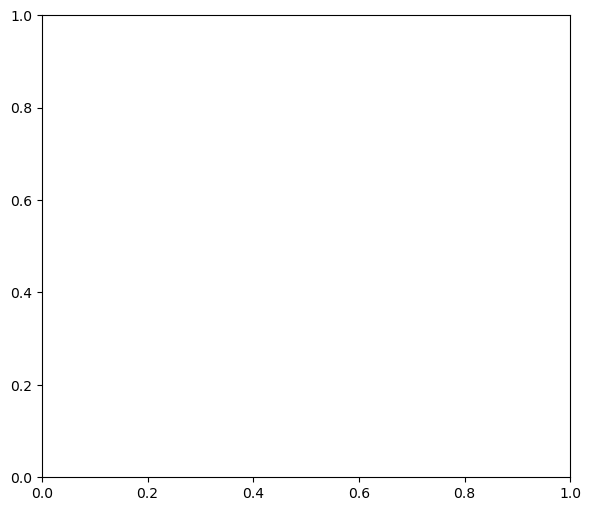

In [54]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1) 
sns.countplot(buisness_travels['age'], hue = 'satisfaction', data = buisness_travels).set_title("satisfaction according to age, buisness travel")

plt.subplot(1, 2, 2)
sns.countplot(personal_travels['age'], hue = 'satisfaction', data = personal_travels).set_title("satisfaction according to age, personal travel")

plt.show()

In [55]:
def get_satisfaction_rate(column):
    
    buis =  buisness_travels.groupby([column, 'satisfaction'])['satisfaction'].count().unstack().fillna(0)
    pers = personal_travels.groupby([column, 'satisfaction'])['satisfaction'].count().unstack().fillna(0)
    return buis, pers

In [56]:
def print_dist(column):
    plt.figure(figsize = (15, 6))
    plt.subplot(1, 2, 1) 
    sns.countplot(buisness_travels[column], hue = 'satisfaction', data = buisness_travels).set_title('satisfaction with {}, buisness travel'.format(column))

    plt.subplot(1, 2, 2)
    sns.countplot(personal_travels[column], hue = 'satisfaction', data = personal_travels).set_title("satisfaction with {}, personal travel".format(column))

    plt.show()

In [57]:
def print_plot(column):
    satis=b["satisfaction"]
    num0=satis[b[column]==0].value_counts()
    num1=satis[b[column]==1].value_counts()
    num2=satis[b[column]==2].value_counts()
    num3=satis[b[column]==3].value_counts()
    num4=satis[b[column]==4].value_counts()
    num5=satis[b[column]==5].value_counts()
    plotdata=pd.DataFrame({"0":num0, "1":num1, "2":num2,"3":num3,"4":num4,"5":num5})
    plotdata2=plotdata.div(plotdata.sum(axis=1),axis=0)*100
    plotdata2.plot(kind='bar',stacked = True, title = 'Effect of {} on satisfaction in business travel'.format(column))

    satis=p["satisfaction"]
    num0=satis[p[column]==0].value_counts()
    num1=satis[p[column]==1].value_counts()
    num2=satis[p[column]==2].value_counts()
    num3=satis[p[column]==3].value_counts()
    num4=satis[p[column]==4].value_counts()
    num5=satis[p[column]==5].value_counts()
    plotdata=pd.DataFrame({"0":num0, "1":num1, "2":num2,"3":num3,"4":num4,"5":num5})
    plotdata2=plotdata.div(plotdata.sum(axis=1),axis=0)*100
    plotdata2.plot(kind='bar',stacked = True, title = 'Effect of {} on satisfaction in personal travel'.format(column))


In [58]:
wifi_sat_buisness, wifi_sat_personal = get_satisfaction_rate('inflight_wifi_service')
print(wifi_sat_buisness)
print() 
print(wifi_sat_personal)

satisfaction           neutral or dissatisfied  satisfied
inflight_wifi_service                                    
0                                            8       2341
1                                         6112       5457
2                                         9645       6081
3                                         9391       6131
4                                         4068      10158
5                                          100       9713

satisfaction           neutral or dissatisfied  satisfied
inflight_wifi_service                                    
0                                          0.0      645.0
1                                       5772.0        0.0
2                                       9530.0        0.0
3                                       9758.0        0.0
4                                       3771.0     1318.0
5                                          0.0     1294.0


<AxesSubplot:xlabel='inflight_wifi_service'>

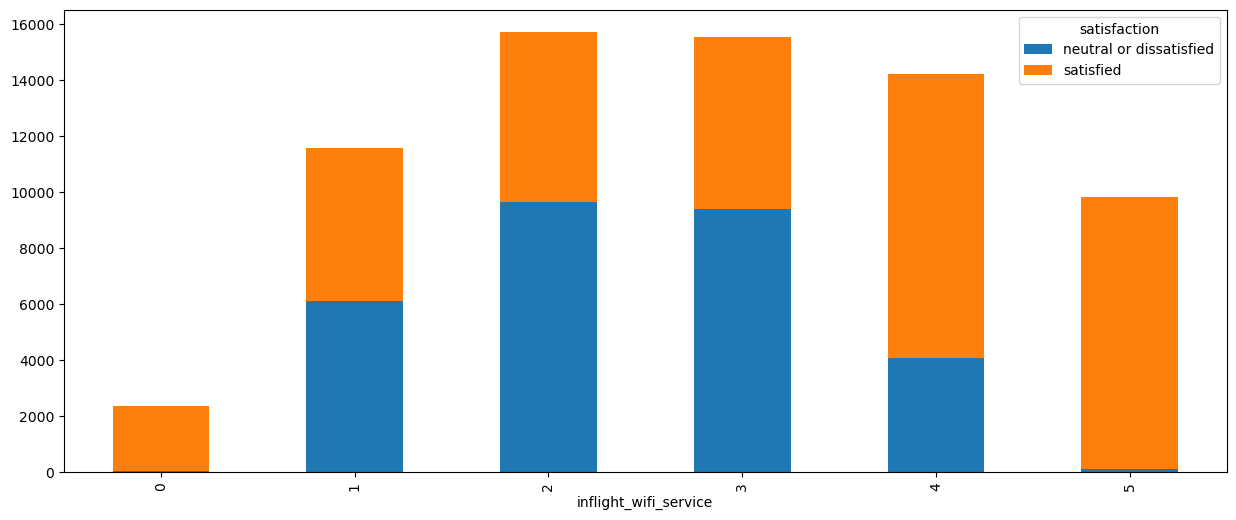

In [59]:
wifi_sat_buisness.plot(kind = 'bar', stacked = True, figsize = (15, 6))

<AxesSubplot:xlabel='inflight_wifi_service'>

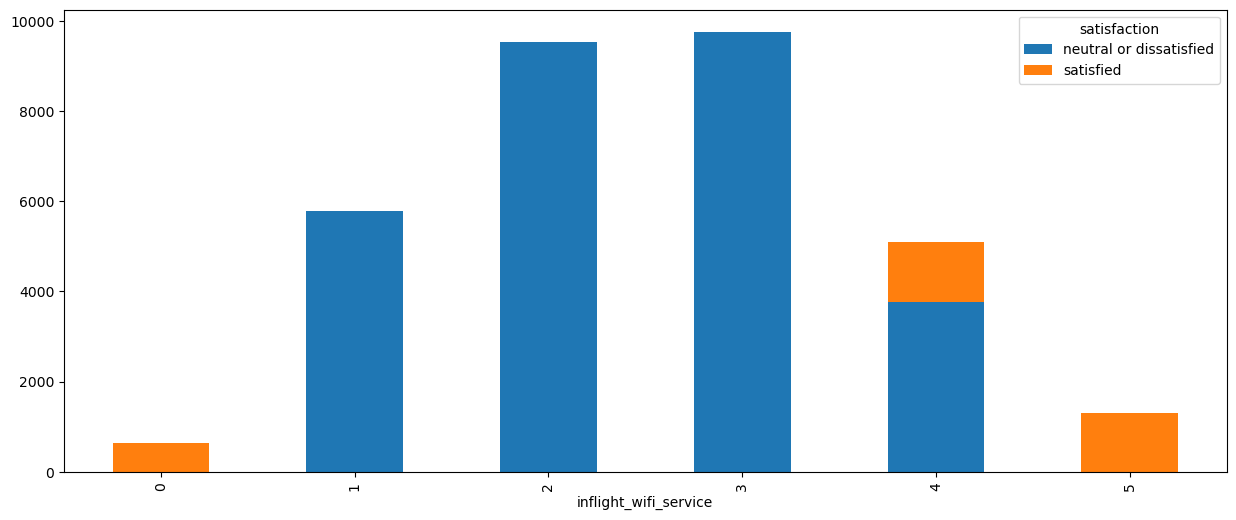

In [60]:
wifi_sat_personal.plot(kind = 'bar', stacked = True, figsize = (15, 6)) #analysis of the data on the 

In [61]:
booking_sat_buisness, booking_sat_personal = get_satisfaction_rate('ease_of_online_booking')

print(booking_sat_buisness)
print(booking_sat_personal)

satisfaction            neutral or dissatisfied  satisfied
ease_of_online_booking                                    
0                                           383       2195
1                                          5479       6203
2                                          7604       6928
3                                          7612       7093
4                                          5175       8825
5                                          3071       8637
satisfaction            neutral or dissatisfied  satisfied
ease_of_online_booking                                    
0                                          1110        682
1                                          5326         58
2                                          8949         33
3                                          9118         92
4                                          3874       1164
5                                           454       1228


TypeError: countplot() got multiple values for argument 'data'

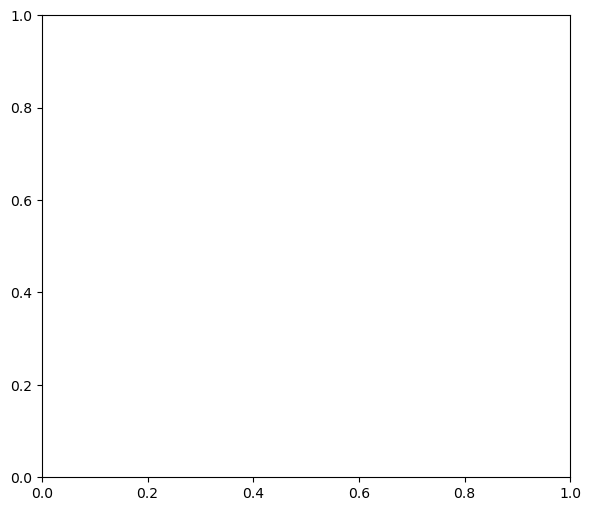

In [62]:
print_dist('ease_of_online_booking')

In [63]:
gate_sat_buisness, gate_sat_personal = get_satisfaction_rate('gate_location')
gate_sat_buisness, gate_sat_personal

(satisfaction   neutral or dissatisfied  satisfied
 gate_location                                    
 0                                  0.0        1.0
 1                               4488.0     7828.0
 2                               5147.0     7999.0
 3                               8431.0     8396.0
 4                               7504.0     8268.0
 5                               3754.0     7389.0,
 satisfaction   neutral or dissatisfied  satisfied
 gate_location                                    
 1                                 4243        493
 2                                 5196        603
 3                                10043       1134
 4                                 7283        821
 5                                 2066        206)

TypeError: countplot() got multiple values for argument 'data'

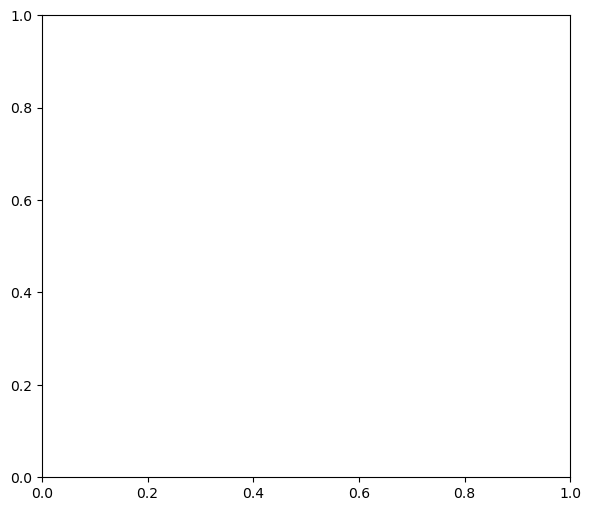

In [64]:
print_dist('gate_location')

In [65]:
food_sat_buisness, food_sat_personal = get_satisfaction_rate('food_and_drink')
food_sat_buisness, food_sat_personal

(satisfaction    neutral or dissatisfied  satisfied
 food_and_drink                                    
 0                                    23         30
 1                                  5635       2000
 2                                  7000       7508
 3                                  6967       7755
 4                                  5491      11555
 5                                  4208      11033,
 satisfaction    neutral or dissatisfied  satisfied
 food_and_drink                                    
 0                                    31         16
 1                                  4493        505
 2                                  6274        667
 3                                  6309        665
 4                                  5967        712
 5                                  5757        692)

TypeError: countplot() got multiple values for argument 'data'

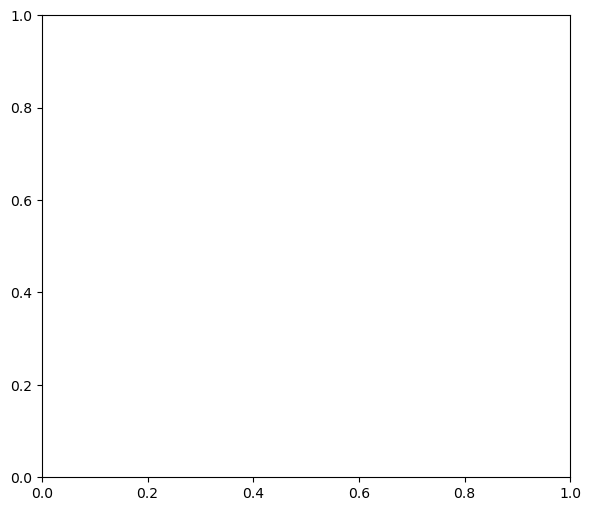

In [66]:
print_dist('food_and_drink')

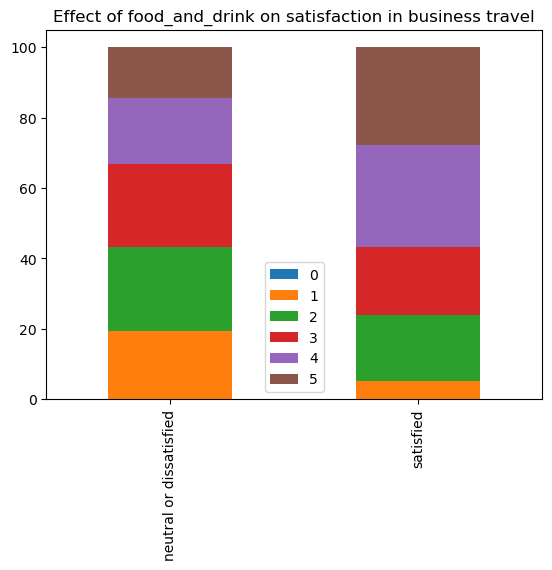

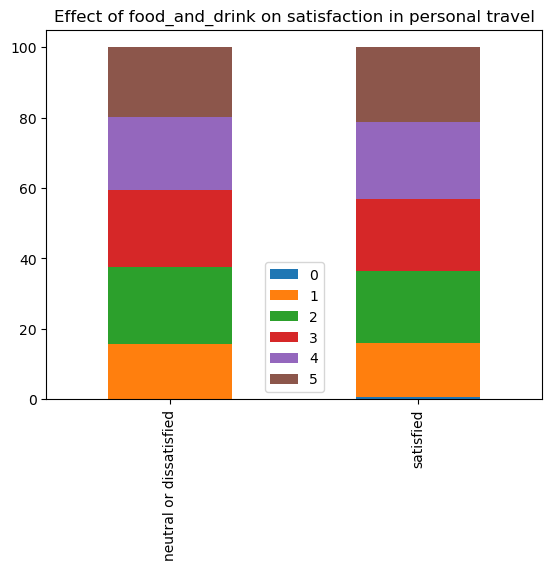

In [67]:
print_plot('food_and_drink')

In [68]:
dep_sat_buisness, dep_sat_personal = get_satisfaction_rate('departure/arrival_time_convenient')
dep_sat_buisness, dep_sat_personal

(satisfaction                       neutral or dissatisfied  satisfied
 departure/arrival_time_convenient                                    
 0                                                     1983       2375
 1                                                     5400       6902
 2                                                     6661       7008
 3                                                     6501       7167
 4                                                     5266       8324
 5                                                     3513       8105,
 satisfaction                       neutral or dissatisfied  satisfied
 departure/arrival_time_convenient                                    
 0                                                      786         81
 1                                                     2428        283
 2                                                     2732        305
 3                                                     3442        340
 4   

TypeError: countplot() got multiple values for argument 'data'

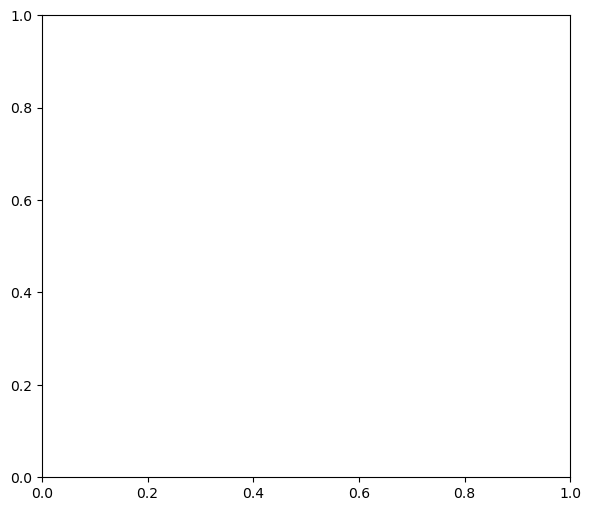

In [69]:
print_dist('departure/arrival_time_convenient')

TypeError: countplot() got multiple values for argument 'data'

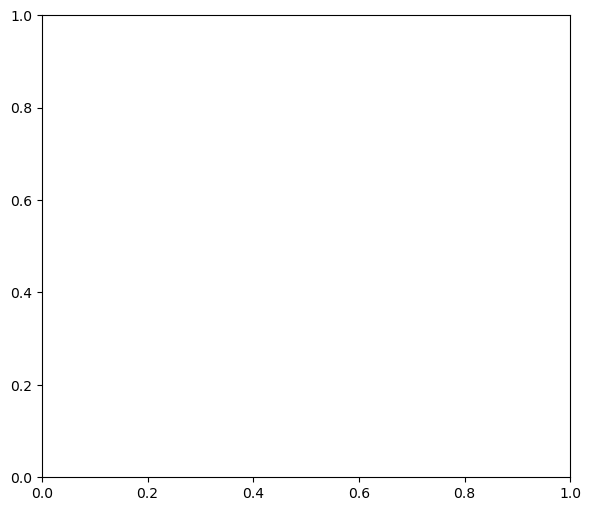

In [70]:
print_dist('inflight_entertainment')

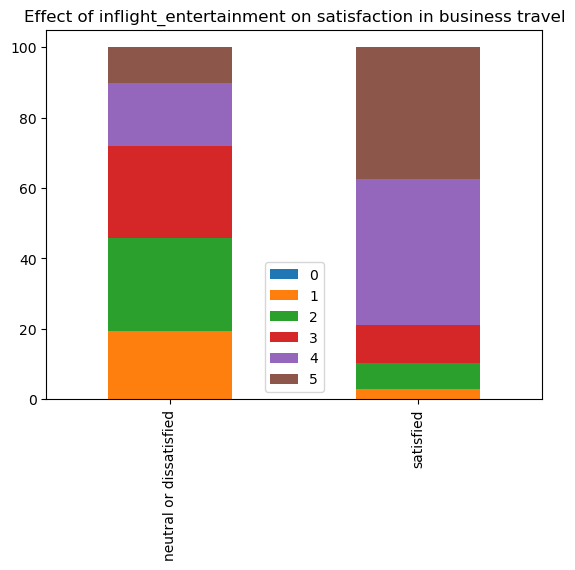

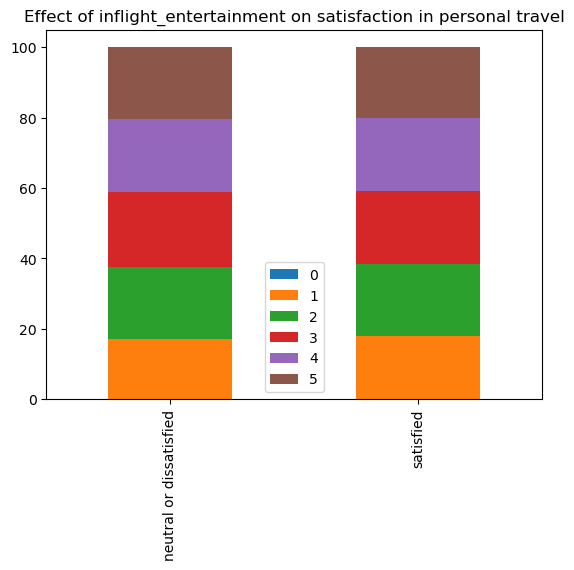

In [71]:
print_plot('inflight_entertainment')

TypeError: countplot() got multiple values for argument 'data'

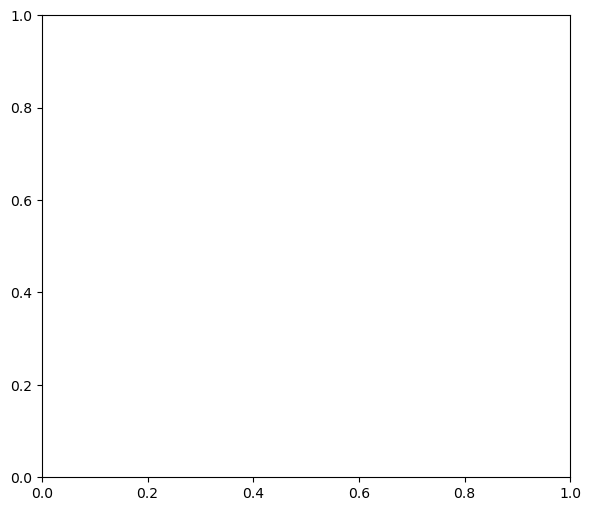

In [72]:
print_dist('online_boarding')

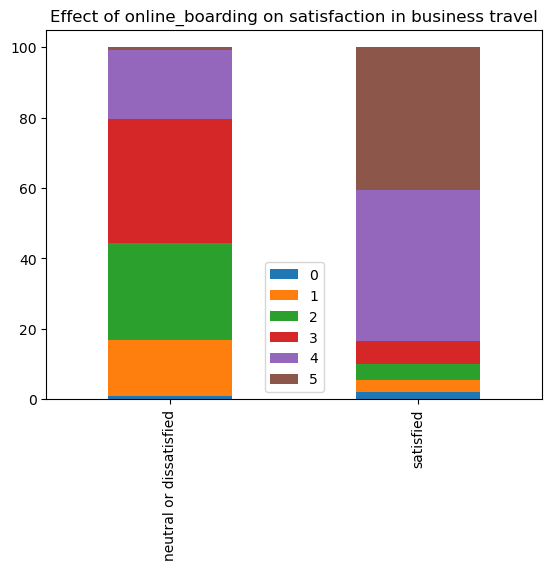

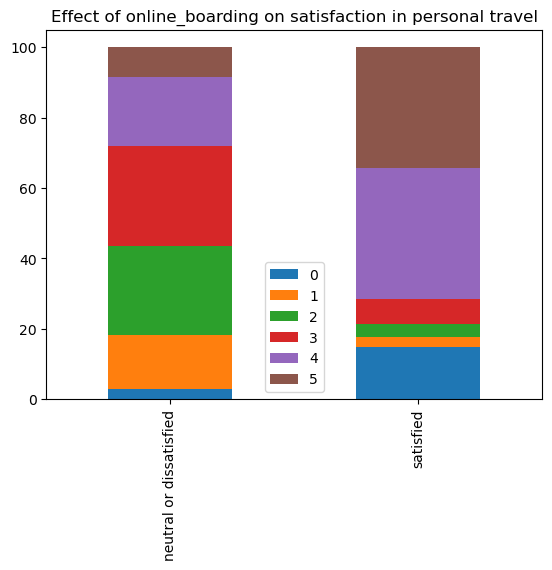

In [73]:
print_plot('online_boarding')

TypeError: countplot() got multiple values for argument 'data'

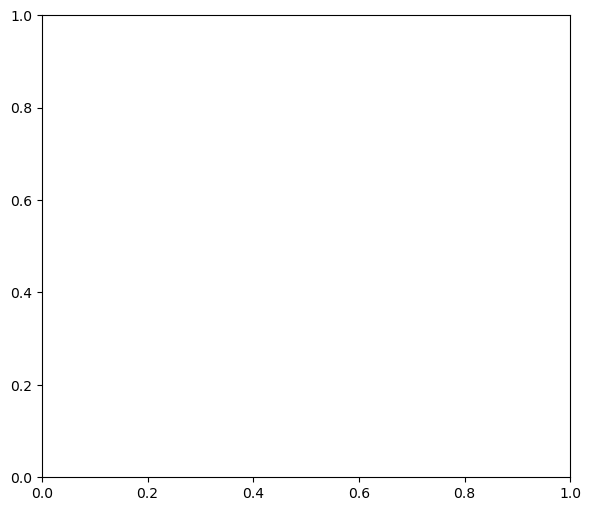

In [74]:
print_dist('seat_comfort')

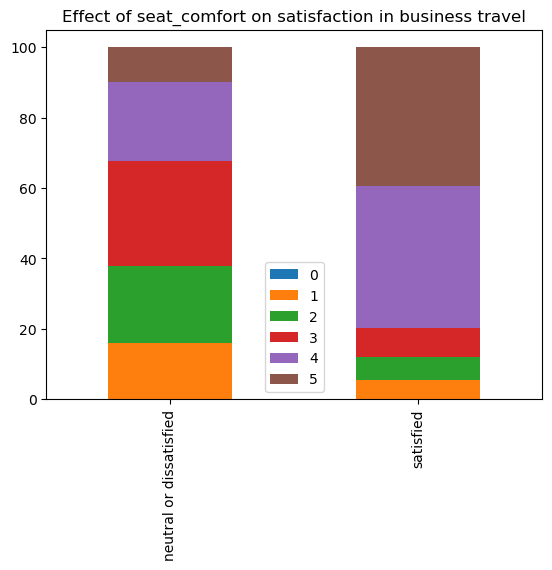

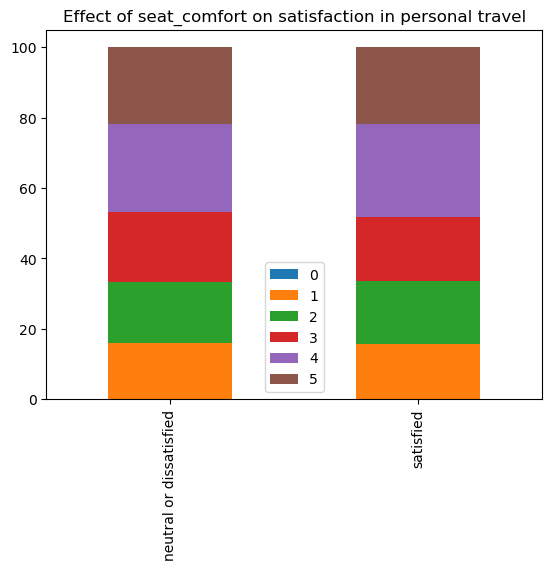

In [75]:
print_plot('seat_comfort')

TypeError: countplot() got multiple values for argument 'data'

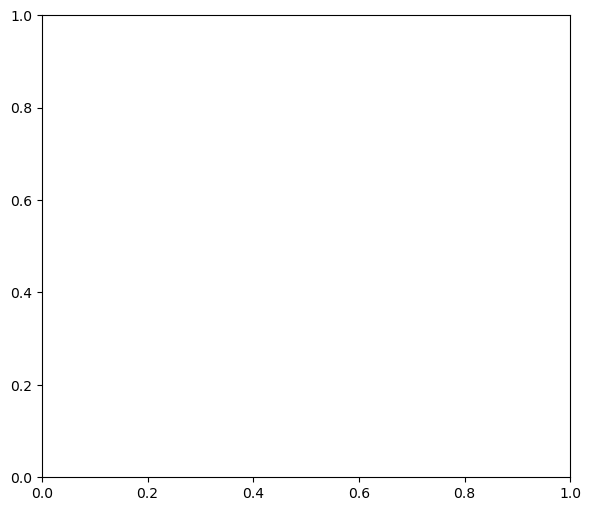

In [76]:
print_dist('on-board_service')

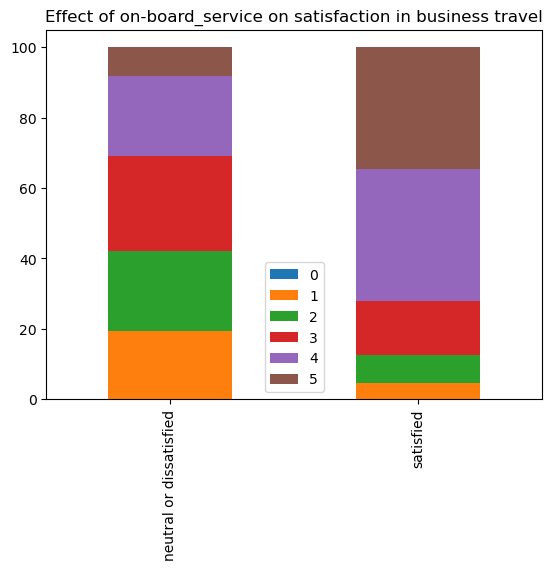

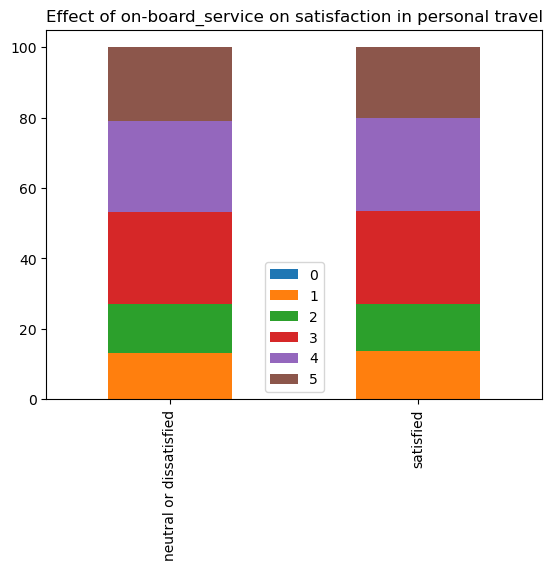

In [77]:
print_plot('on-board_service')

TypeError: countplot() got multiple values for argument 'data'

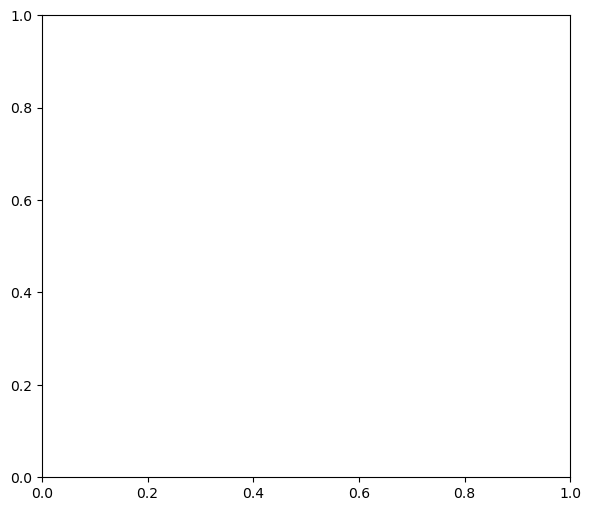

In [78]:
print_dist('leg_room_service')

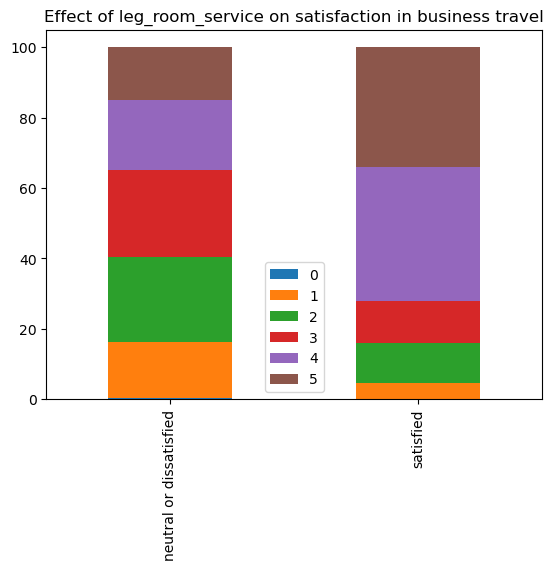

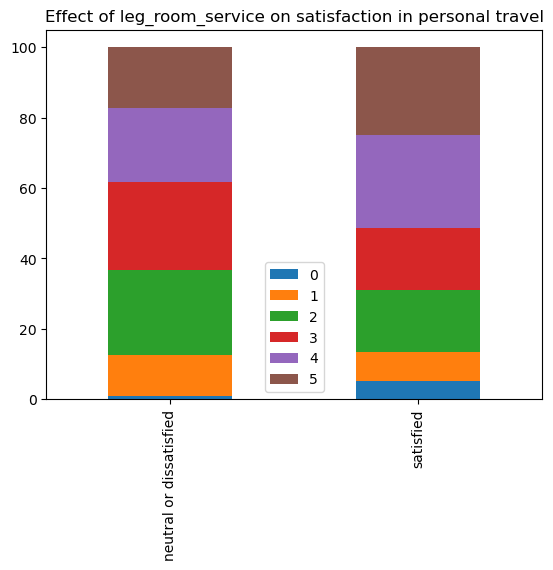

In [79]:
print_plot('leg_room_service')

TypeError: countplot() got multiple values for argument 'data'

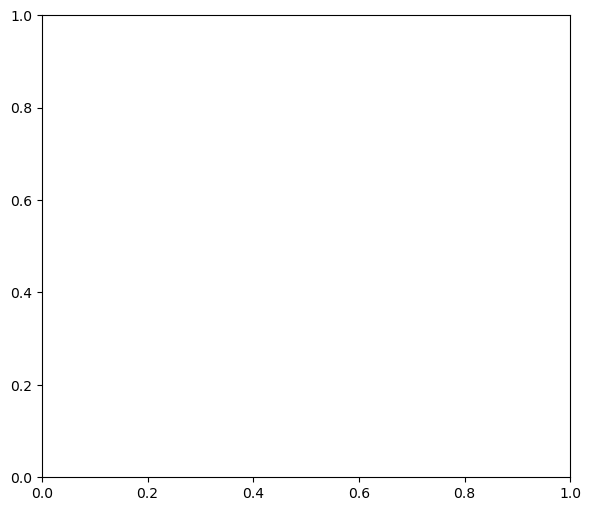

In [80]:
print_dist('baggage_handling')

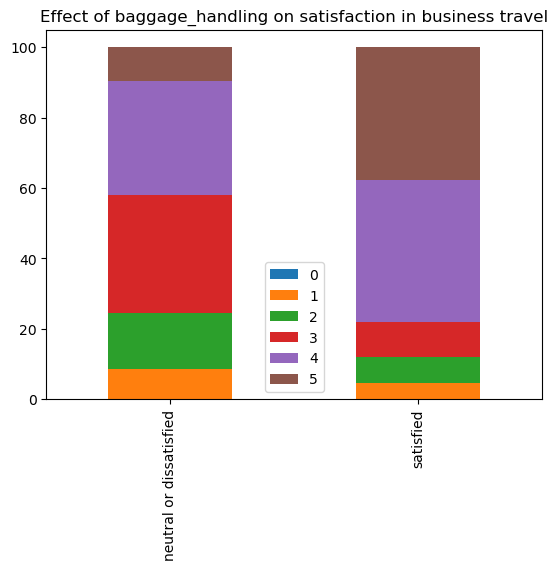

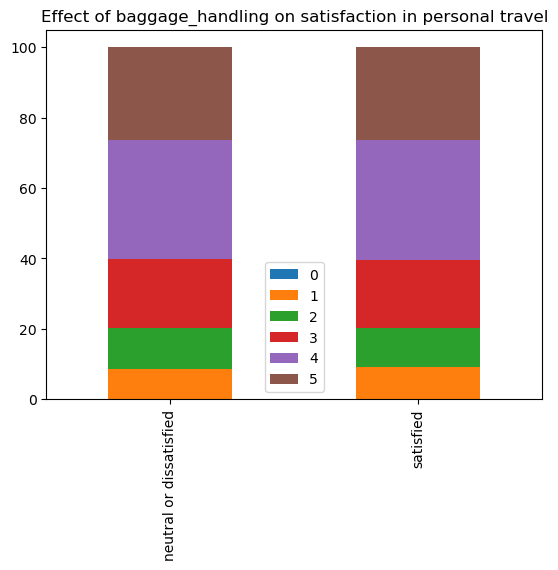

In [81]:
print_plot('baggage_handling')

TypeError: countplot() got multiple values for argument 'data'

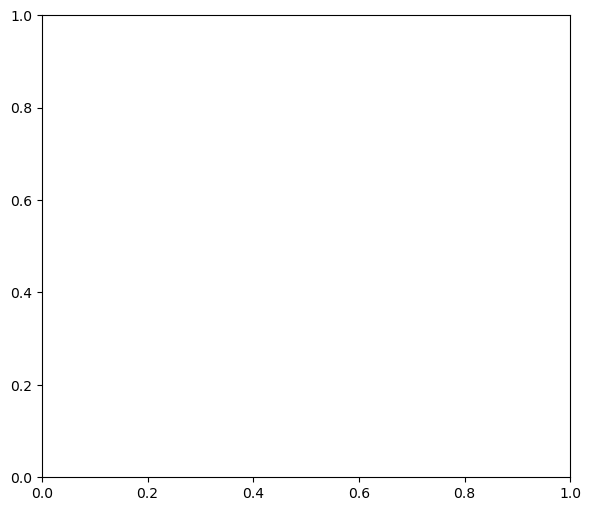

In [82]:
print_dist('checkin_service')

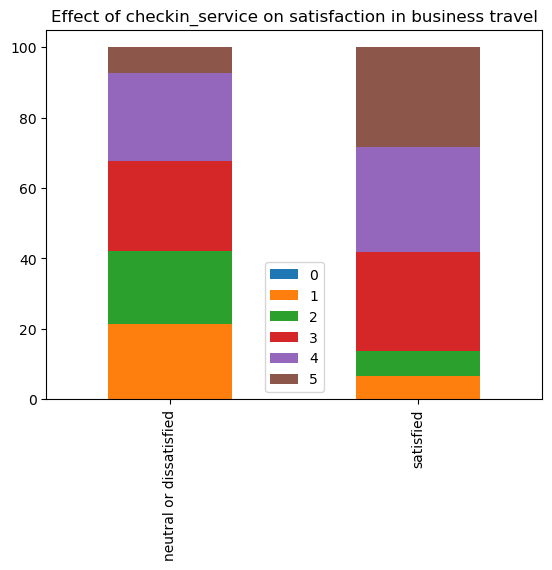

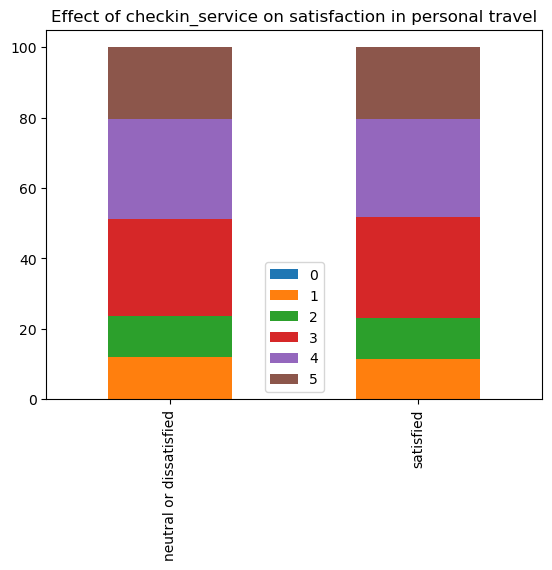

In [83]:
print_plot('checkin_service')

TypeError: countplot() got multiple values for argument 'data'

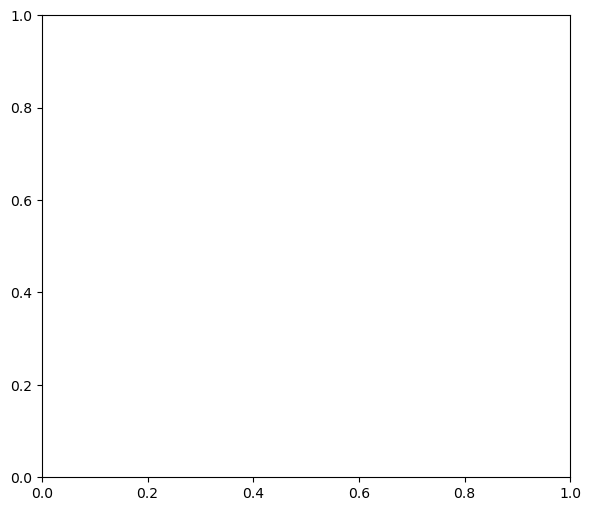

In [84]:
print_dist('inflight_service')

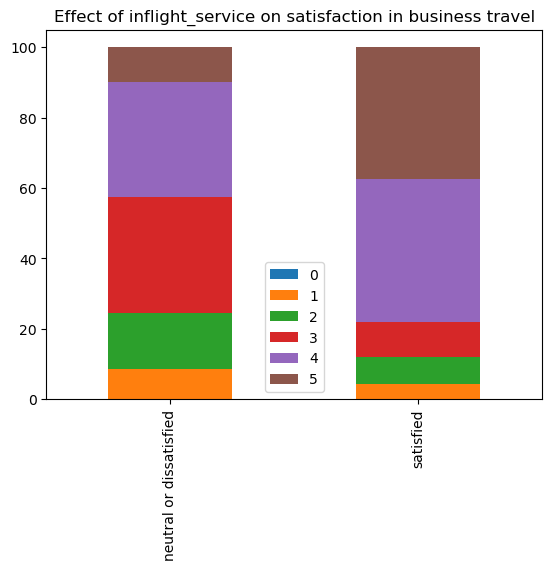

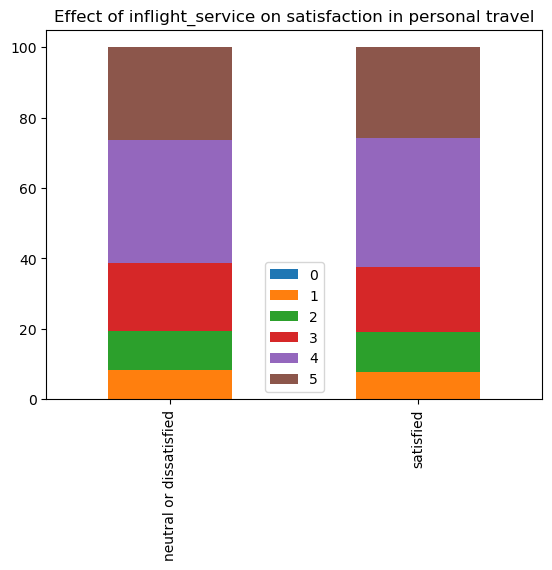

In [85]:
print_plot('inflight_service')

TypeError: countplot() got multiple values for argument 'data'

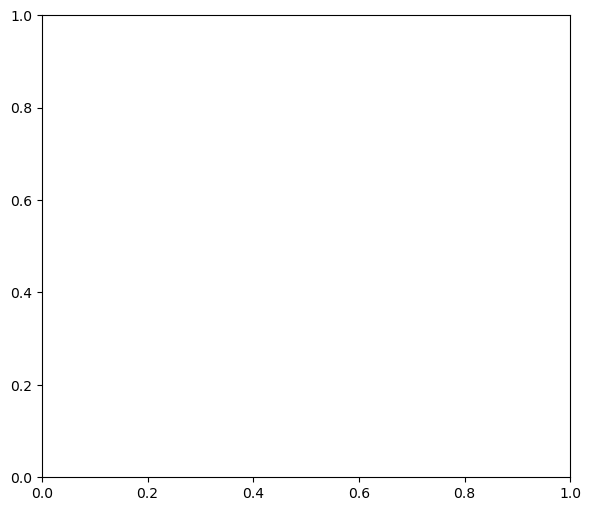

In [86]:
print_dist('cleanliness')

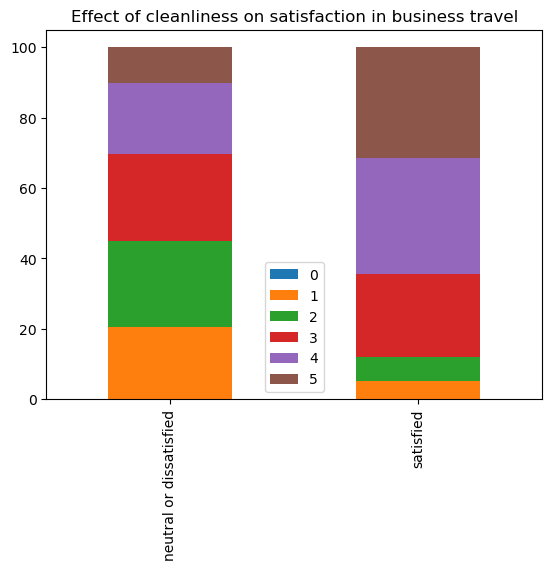

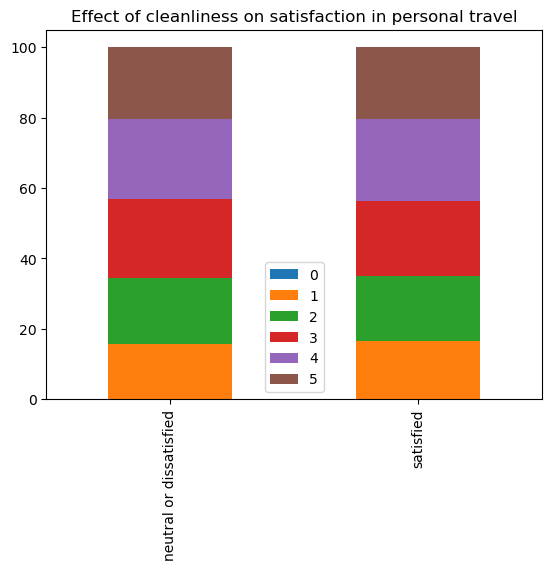

In [87]:
print_plot('cleanliness')

<AxesSubplot:>

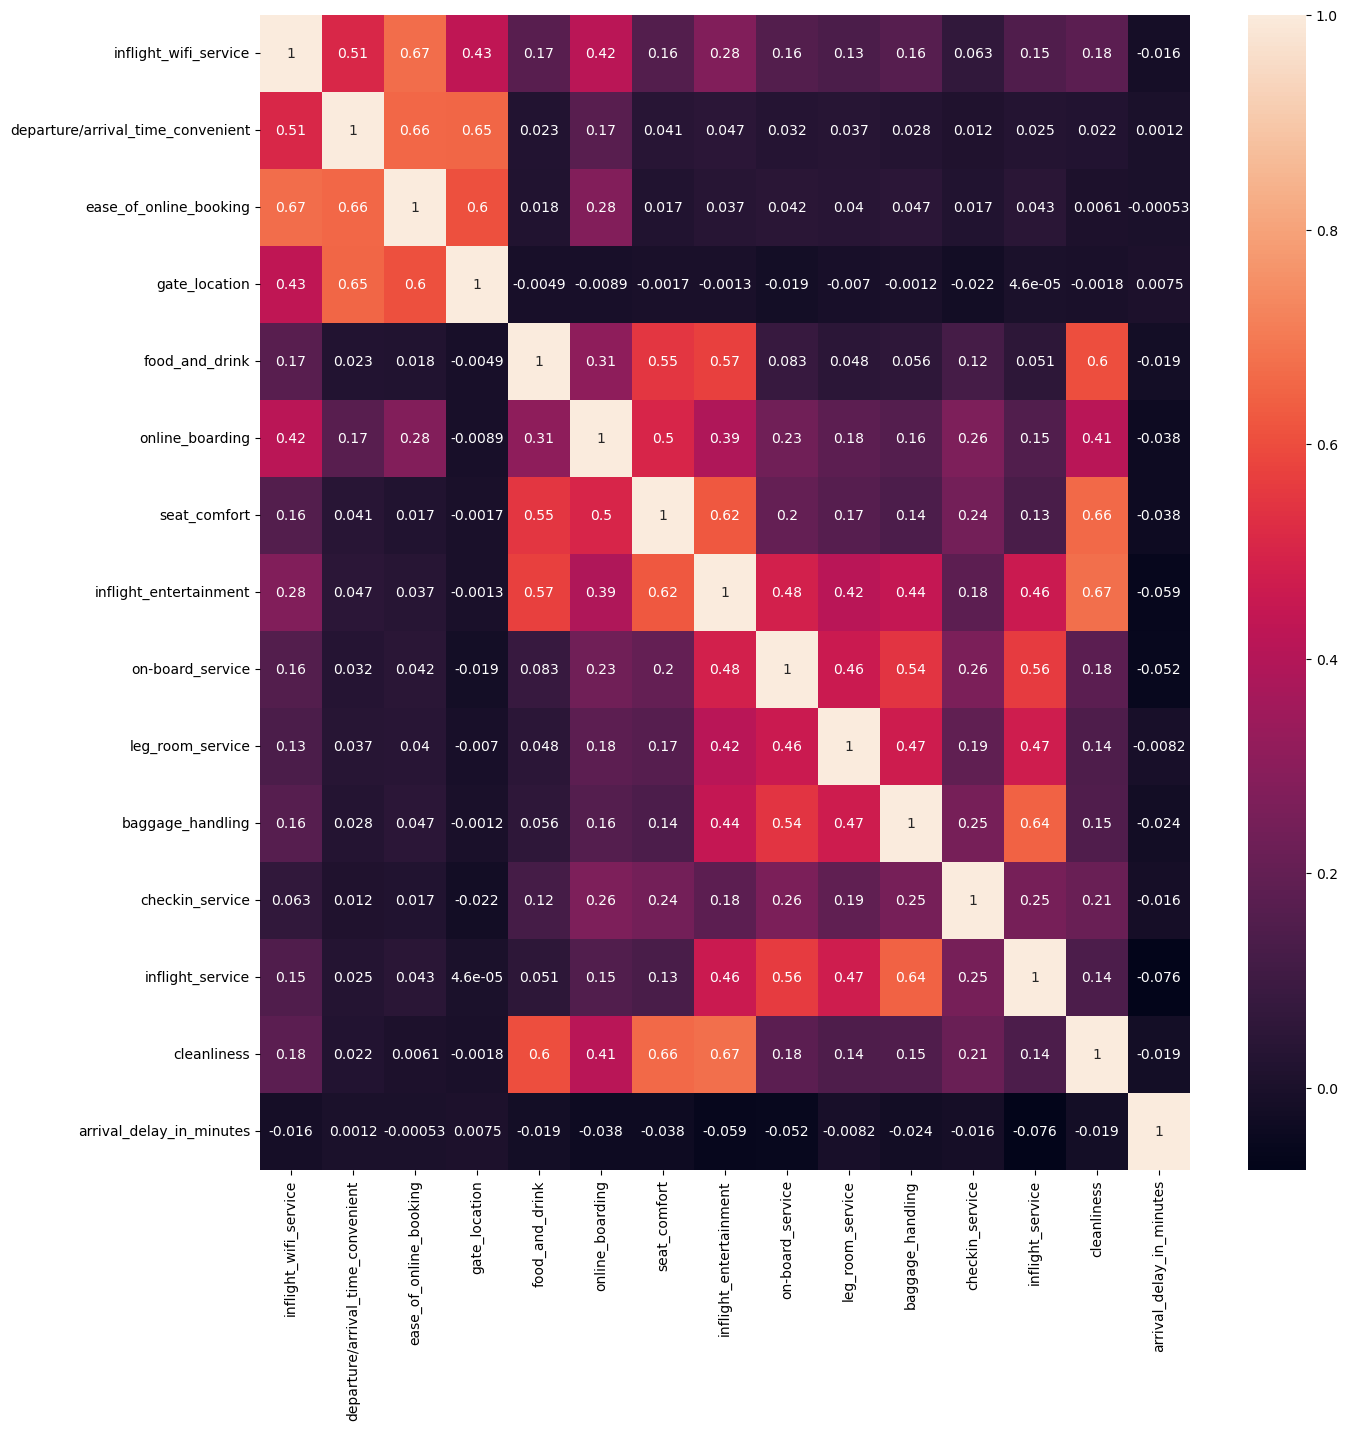

In [88]:
plt.figure(figsize = (15,15))
sns.heatmap(buisness_travels.corr(), annot = True)

<AxesSubplot:xlabel='inflight_wifi_service', ylabel='ease_of_online_booking'>

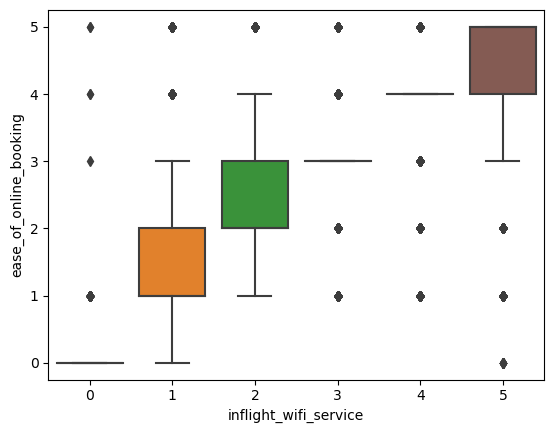

In [89]:
sns.boxplot(x = 'inflight_wifi_service', y = 'ease_of_online_booking', data = buisness_travels)

<AxesSubplot:xlabel='inflight_wifi_service', ylabel='ease_of_online_booking'>

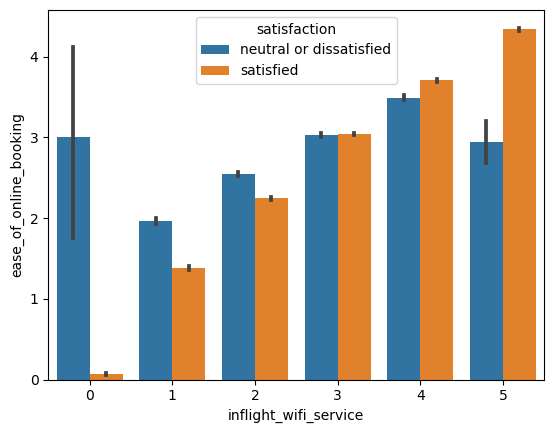

In [90]:
sns.barplot(x='inflight_wifi_service', y='ease_of_online_booking', hue = 'satisfaction', data = buisness_travels)

<AxesSubplot:xlabel='ease_of_online_booking', ylabel='departure/arrival_time_convenient'>

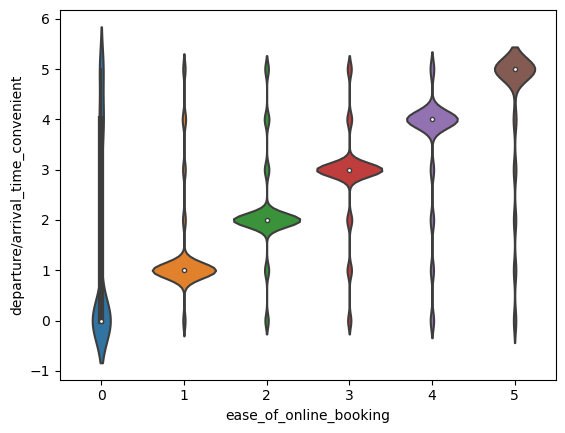

In [91]:
sns.violinplot(x = 'ease_of_online_booking', y = 'departure/arrival_time_convenient', data = buisness_travels)

<AxesSubplot:xlabel='cleanliness', ylabel='food_and_drink'>

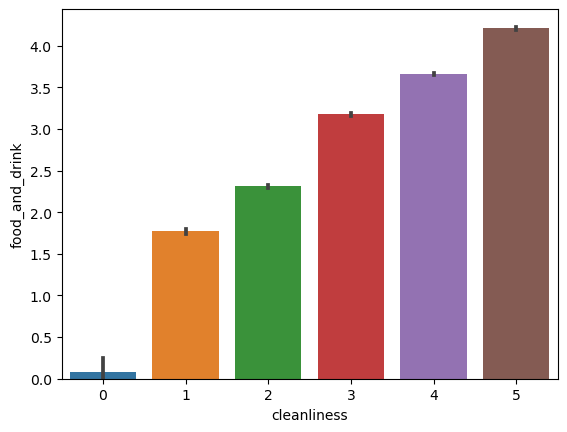

In [92]:
sns.barplot(x = 'cleanliness', y = 'food_and_drink', data = buisness_travels)

In [93]:
df_3 = df.drop(['gender', 'departure_delay_in_minutes', 'gate_location'], axis = 1)
df_3

,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,5,3,5,5,4,3,4,4,5,5,18.0,neutral or dissatisfied
1,disloyal Customer,25,Business travel,Business,235,3,2,3,1,3,1,1,1,5,3,1,4,1,6.0,neutral or dissatisfied
2,Loyal Customer,26,Business travel,Business,1142,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,satisfied
3,Loyal Customer,25,Business travel,Business,562,2,5,5,2,2,2,2,2,5,3,1,4,2,9.0,neutral or dissatisfied
4,Loyal Customer,61,Business travel,Business,214,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,disloyal Customer,23,Business travel,Eco,192,2,1,2,2,2,2,2,3,1,4,2,3,2,0.0,neutral or dissatisfied
103900,Loyal Customer,49,Business travel,Business,2347,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,satisfied
103901,disloyal Customer,30,Business travel,Business,1995,1,1,1,4,1,5,4,3,2,4,5,5,4,14.0,neutral or dissatisfied
103902,disloyal Customer,22,Business travel,Eco,1000,1,1,1,1,1,1,1,4,5,1,5,4,1,0.0,neutral or dissatisfied


In [94]:
categorical = ['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']
#Count number of distinct elements in specified axis.
maxDistinct = 0
for column in categorical:
    distinctRows1 = df[column].nunique()
    distinctRows2 = df2[column].nunique()
    if distinctRows1 > maxDistinct:
        maxDistinct = distinctRows1
    if distinctRows2 > maxDistinct:
        maxDistinct = distinctRows2

print('The maximum number of distinct values of a categorical feature is', maxDistinct)

The maximum number of distinct values of a categorical feature is 3


In [95]:
# Categorical to numerical in train set
for column in categorical:
    numerical = pd.get_dummies(df[column], drop_first=True)
    df = pd.concat([df, numerical], axis=1)
    df.drop(column, inplace=True, axis=1)

df.head()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,1,0,1,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,1,1,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,0,0,0,0,1


In [96]:
# Categorical to numerical in test set
for column in categorical:
    numerical = pd.get_dummies(df2[column], drop_first=True)
    df2 = pd.concat([df2, numerical], axis=1)
    df2.drop([column], inplace=True, axis=1)

df2.head()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,satisfied
0,52,160,5,4,3,4,3,4,3,5,...,5,5,50,44.0,0,0,0,1,0,1
1,36,2863,1,1,3,1,5,4,5,4,...,4,5,0,0.0,0,0,0,0,0,1
2,20,192,2,0,2,4,2,2,2,2,...,2,2,0,0.0,1,1,0,1,0,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,4,0,6.0,1,0,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,0,20.0,0,0,0,1,0,1


In [97]:
# Find whether any null value exists in train_df and test_df
print(df.isna().sum())
print(df2.isna().sum())

age                                  0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
Male                                 0
disloyal Customer                    0
Personal Travel                      0
Eco                                  0
Eco Plus                             0
satisfied                            0
dtype: int64
age                                  0
flight_dista

In [98]:
# Convert pandas to numpy array for processing
train = df.values
test = df2.values

In [99]:
# Seperate labels from features. Label is our last column
idx_of_label = df.shape[1] - 1

X_train = train[:, :idx_of_label]
y_train = train[:, idx_of_label]

X_test = test[:, :idx_of_label]
y_test = test[:, idx_of_label]

# Final data shapes
print(X_train.shape)
print(y_train.shape)

(101293, 23)
(101293,)


In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
#We use Feature Scaling to standardize the independent features in a fixed range so each feature contributes approximately to model. 

In [101]:
no_of_satisfied = np.sum(y_train, axis=0)
samples = y_train.shape[0]
print('The percentage of satisfied customers is: {:.2f} %'.format((no_of_satisfied / samples) * 100))
print('The percentage of dissatisfied customers is: {:.2f} %'.format((1 - (no_of_satisfied / samples)) * 100))

The percentage of satisfied customers is: 42.59 %
The percentage of dissatisfied customers is: 57.41 %


In [102]:
#importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

ModuleNotFoundError: No module named 'xgboost'

In [103]:
#importing validation models
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay

In [104]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):
 
    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic),"Recall_Score":recall_score(y_test,predic),
                       "F1_Score":f1_score(y_test,predic) , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [105]:
# Train KNN model on the scaled data 
KNN = KNeighborsClassifier()
# Fit the model
KNN.fit(X_train_scaled,y_train)
#predict x_test_scaled
pred_1 = KNN.predict(X_test_scaled)

In [ ]:
#calling the score function
Eval_KNN= classification_task(KNN,X_train_scaled, y_train ,X_test_scaled ,y_test,pred_1,"KNN" )
Eval_KNN

In [ ]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_1 ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [ ]:
# Train decision tree model on the scaled data
Decision_Tree = DecisionTreeClassifier() 
# Fit the model
Decision_Tree.fit(X_train_scaled,y_train)
#predict x_test_scaled
pred_ = Decision_Tree.predict(X_test_scaled)

In [ ]:
#calling the score function
Eval_dec = classification_task(Decision_Tree,X_train_scaled, y_train ,X_test_scaled ,y_test,pred_,"Decision Tree" )
Eval_dec

In [ ]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_ ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [ ]:
# Train Random forest model on the scaled data
Random_Forest= RandomForestClassifier()
# Fit the model
Random_Forest.fit(X_train_scaled,y_train)
#predict x_test_scaled
pred_rand = Random_Forest.predict(X_test_scaled)

In [ ]:
#calling the score function
Eval_fores= classification_task(Random_Forest,X_train_scaled, y_train ,X_test_scaled ,y_test,pred_rand,"Random Forest" )
Eval_fores

In [ ]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_rand ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [ ]:
# Train XGB boost model on the scaled data
xgb = XGBClassifier()
# Fit the model
xgb.fit(X_train_scaled,y_train)
#predict x_test_scaled
pred = xgb.predict(X_test_scaled)

In [ ]:
#calling the score function
Eval_XGB= classification_task(xgb,X_train_scaled, y_train ,X_test_scaled ,y_test,pred,"XGB" )
Eval_XGB

In [ ]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [ ]:
# Train naive bayes boost model on the scaled data
clf = GaussianNB()
# Fit the model
clf.fit(X_train_scaled,y_train)
#predict x_test_scaled
pred_clf = clf.predict(X_test_scaled)

In [ ]:
#calling the score function
Eval_clf= classification_task(clf,X_train_scaled, y_train ,X_test_scaled ,y_test,pred_clf,"Naive Bayes" )
Eval_clf

In [ ]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_clf ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [ ]:
# Train the Logistic Regression model on the scaled data and print the model score
lr = LogisticRegression()
# Fit the model
lr.fit(X_train_scaled, y_train)
#predict x_test_scaled
pred_2 = lr.predict(X_test_scaled)

In [ ]:
#calling the score function
Eval_lr= classification_task(lr,X_train_scaled, y_train ,X_test_scaled ,y_test,pred_2,"logisitc regression" )
Eval_lr

In [ ]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_2 ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [ ]:
# Train the svc model on the scaled data and print the model score
svc = SVC(random_state=0,C=0.2,kernel='rbf')
#fitting model
svc.fit(X_train_scaled, y_train)
#predict
pred_svc = svc.predict(X_test_scaled)

In [ ]:
#calling the score function
Eval_svc= classification_task(svc,X_train_scaled, y_train ,X_test_scaled ,y_test,pred_svc,"SVC" )
Eval_svc

In [ ]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_svc ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [ ]:
#model comparison 
pd.concat([Eval_KNN, Eval_dec , Eval_fores , Eval_XGB ,Eval_clf , Eval_lr, Eval_svc])   

In [ ]:
plt.figure(figsize=(12, 8))
cf_matrix=confusion_matrix(y_test,pred_rand)
group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',xticklabels=["neutral or dissatisfied","satisfied"], yticklabels=["neutral or dissatisfied","satisfied"])
ax.set_xlabel('Predicted Label',fontsize = 15)
ax.set_ylabel('Actual Label',fontsize = 15)
plt.show()

In [ ]:
print(classification_report(y_test, pred_rand))

In [ ]:
plt.figure(figsize=(12, 8))
cf_matrix=confusion_matrix(y_test,pred)
group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',xticklabels=["neutral or dissatisfied","satisfied"], yticklabels=["neutral or dissatisfied","satisfied"])
ax.set_xlabel('Predicted Label',fontsize = 15)
ax.set_ylabel('Actual Label',fontsize = 15)
plt.show()

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
feature_names = [f"feature {i}" for i in range(X_train_scaled.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_scaled, y_train)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = Random_Forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in Random_Forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
import pandas as pd

Random_Forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
Random_Forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
#Applying featureimportances over the trained model shows the weight each column (feature) has. For example, the 7-th feature ("Online Boarding") has the highest importance for determining a passenger's satisfaction as we in visualization.